In [95]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import concurrent.futures

In [259]:
import os
os.listdir('./data/')

['9914TT106A.PV.csv',
 '9911LIA027.PV.csv',
 '7951_TV021A.OUT.csv',
 '9911PDIA057.PV.csv',
 '214_LZA306A.PNT.csv',
 '9914LISA032.PV.csv',
 '9914LICA070.PV.csv',
 '524_LIZA028C.PNT.csv',
 '9911PI031.PV.csv',
 '8911LZA004A.PNT.csv',
 '9911TICA033.PV.csv',
 '7913_TIA011.PNT.csv',
 '8915_TIA021.PNT.csv']

In [260]:
!pwd

/Users/himalayaashish/Desktop/TimeSeries


In [261]:
csv_file = './data/8915_TIA021.PNT.csv'  # Replace with your actual file path
file_name = os.path.splitext(os.path.basename(csv_file))[0]
file_name

'8915_TIA021.PNT'

In [262]:
# value = []
# for i in range(15*24*60):
#     a = math.sin(i+10500) 
#     print(i+a)
#     value.append(i+a)

In [263]:
# import datetime
# base = datetime.datetime.today()
# date_list = [base - datetime.timedelta(days=x) for x in range(15*24*60)]
# date_list

In [264]:
# data = pd.DataFrame({'DATE':date_list,'VALUES':value})
# data.head()

In [265]:
# # col_1 = -x+\sin x^{2}+10
# import math
# a = math.sin(9) +10
# result = -3+a
# result

In [267]:
data = pd.read_csv(csv_file)  # Replace with your actual data file
data.columns = ['Timestamp', 'Value']

data.head()

,Timestamp,Value
0,10/15/2023,50.09116
1,10/16/2023,46.28855
2,10/17/2023,47.94576
3,10/18/2023,44.11554
4,10/19/2023,45.35083


In [268]:
data.describe()

,Value
count,361.000000
mean,48.410017
std,17.723790
min,24.835370
25%,41.275610
50%,47.251370
75%,52.424930
max,311.000000


In [269]:
data.head()

,Timestamp,Value
0,10/15/2023,50.09116
1,10/16/2023,46.28855
2,10/17/2023,47.94576
3,10/18/2023,44.11554
4,10/19/2023,45.35083


In [270]:
# data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M')
# data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%b-%y %H:%M:%S')

In [271]:
def parse_timestamp_column(data):
    """Function to parse 'Timestamp' column with two different formats."""
    try:
        # First attempt with format '%d/%m/%Y %H:%M'
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M')
        print("Parsed with format '%d/%m/%Y %H:%M'")
    except ValueError:
        try:
            # If the first format fails, attempt with format '%d-%b-%y %H:%M:%S'
            data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%b-%y %H:%M:%S')
            print("Parsed with format '%d-%b-%y %H:%M:%S'")
        except ValueError:
            # Handle the case where both formats fail
            print("Timestamp parsing failed for both formats.")
            raise

# Example of calling the function with a sample dataframe
data = pd.read_csv('./Inputs/8911LZA004A.PNT.csv')  # Load your data
data.columns = ['Timestamp', 'Value']
# Call the function to parse the 'Timestamp' column
parse_timestamp_column(data)


Parsed with format '%d-%b-%y %H:%M:%S'


In [272]:
data.describe()

,Timestamp
count,23040
mean,2022-05-05 00:00:30
min,2022-04-27 00:01:00
25%,2022-05-01 00:00:45
50%,2022-05-05 00:00:30
75%,2022-05-09 00:00:15
max,2022-05-13 00:00:00


In [273]:
data.set_index('Timestamp', inplace=True)

In [274]:
# Normalize the data
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

# Drop rows with NaN values (which result from invalid entries like 'Bad Input')
data.dropna(subset=['Value'], inplace=True)

scaler = StandardScaler()
data['Value_scaled'] = scaler.fit_transform(data[['Value']])
X_train = data['Value_scaled'].values.reshape(-1, 1)

In [275]:
X_train

array([[ -0.0802024 ],
       [ -0.08193218],
       [ -0.08366196],
       ...,
       [  1.71660479],
       [  1.88501222],
       [-34.89206086]])

In [276]:
# Define the autoencoder model
def build_autoencoder():
    input_layer = layers.Input(shape=(1,))
    encoder = layers.Dense(16, activation="relu")(input_layer)
    encoder = layers.Dense(8, activation="relu")(encoder)
    encoder = layers.Dense(4, activation="relu")(encoder)
    
    decoder = layers.Dense(8, activation="relu")(encoder)
    decoder = layers.Dense(16, activation="relu")(decoder)
    output_layer = layers.Dense(1, activation="sigmoid")(decoder)
    
    autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer="adam", loss="mse")
    return autoencoder

# Build the model
autoencoder = build_autoencoder()

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
modelName = file_name+"_model.h5"
# Save the model after training
autoencoder.save("./autoencoder/"+modelName)

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 0.5089 - val_loss: 3.8541
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.1872 - val_loss: 3.8129
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.1579 - val_loss: 3.7893
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.1585 - val_loss: 3.7754
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.1502 - val_loss: 3.7708
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.1587 - val_loss: 3.7687
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.1462 - val_loss: 3.7676
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.1523 - val_loss: 3.7670
Epoch 9/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.1500 - val_loss: 3.7666
Epoch 10/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.1576 - val_loss: 3.7664
Epoch 11/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.1544 - val_loss: 3.7662
Epoch 12/20
135/135 ━━━━━━━━━━

In [277]:
# Reconstruct the data using the trained autoencoder
reconstructed_data = autoencoder.predict(X_train)
reconstructed_data

675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step


array([[3.3352411e-04],
       [3.2074441e-04],
       [3.0845357e-04],
       ...,
       [9.5498520e-01],
       [9.5879072e-01],
       [0.0000000e+00]], dtype=float32)

In [278]:
modelName

'8915_TIA021.PNT_model.h5'

In [279]:
# Load the saved model for future inference
autoencoder_loaded = tf.keras.models.load_model("./autoencoder/"+modelName, compile=False)

# Manually compile the model (if needed for inference)
autoencoder_loaded.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())


In [280]:
reconstructed_data_inference = autoencoder_loaded.predict(X_train)
reconstructed_data_inference

675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


array([[3.3352411e-04],
       [3.2074441e-04],
       [3.0845357e-04],
       ...,
       [9.5498520e-01],
       [9.5879072e-01],
       [0.0000000e+00]], dtype=float32)

In [281]:
(reconstructed_data == reconstructed_data_inference).all()

True

In [282]:
# Calculate reconstruction error for each point
reconstruction_error = tf.keras.losses.mse(X_train, reconstructed_data_inference).numpy()

# Set a threshold for anomaly detection using the 85th percentile
threshold = np.percentile(reconstruction_error, 90)
print(f"Threshold for anomaly detection: {threshold}")

Threshold for anomaly detection: 0.29339902997016926


Anomaly Indices: [  158   159   160 ... 21584 21585 21586]
Anomaly Values: [76.88219452 76.88108826 76.87998962 ... 81.86303711 82.23442841
  1.12942696]


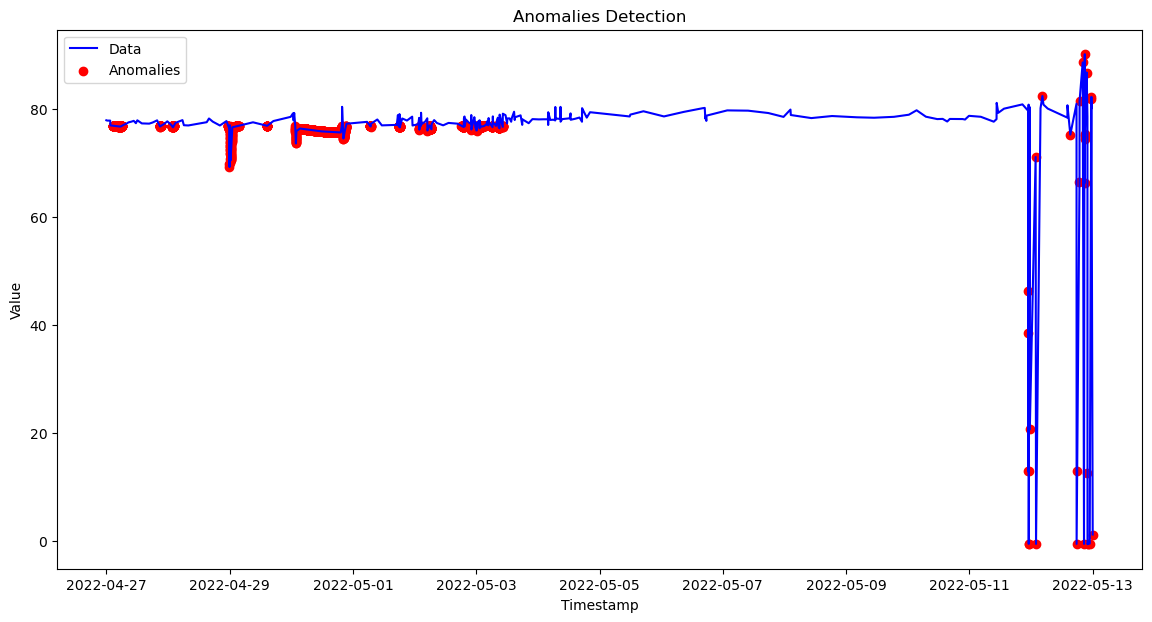

In [283]:
# Detect anomalies based on the threshold
anomalies = reconstruction_error > threshold

# Print the anomalies
anomaly_indices = np.where(anomalies)[0]
anomaly_values = data.iloc[anomaly_indices]['Value']
print(f"Anomaly Indices: {anomaly_indices}")
print(f"Anomaly Values: {anomaly_values.values}")

# Plot the data and anomalies
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Value'], label='Data', color='blue')
plt.scatter(data.iloc[anomaly_indices].index, anomaly_values, color='red', label='Anomalies', marker='o')

# Add labels and title
plt.title('Anomalies Detection')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

# Show and save the plot
# Save the plot with the same name as the CSV file
plot_filename = f'{file_name}_anomalies.png'
plt.savefig(plot_filename)

# Show the plot
plt.show()


In [311]:
import time
def model_inference(model_path, data_path):
    # Start time measurement
    start_time = time.time()
    
    
    data = pd.read_csv(data_path)
    data.columns = ['Timestamp', 'Value']
    data.set_index('Timestamp', inplace=True)

    data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
    data.dropna(subset=['Value'], inplace=True)
    
    scaler = StandardScaler()
    data['Value_scaled'] = scaler.fit_transform(data[['Value']])
    X_train = data['Value_scaled'].values.reshape(-1, 1)

    autoencoder_loaded = tf.keras.models.load_model(model_path, compile=False)
    autoencoder_loaded.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

    # Perform inference on the same data to get reconstructed output
    reconstructed_data_inference = autoencoder_loaded.predict(X_train)

    # Ensure that both X_train and reconstructed_data_inference have the same shape
    reconstruction_error = tf.keras.losses.mse(X_train, reconstructed_data_inference).numpy()

    threshold = np.percentile(reconstruction_error, 90)
    anomalies = reconstruction_error > threshold

    anomaly_indices = np.where(anomalies)[0]
    anomaly_values = data.iloc[anomaly_indices]['Value']
    print(anomaly_values)

    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Value'], label='Data', color='blue')
    plt.scatter(data.iloc[anomaly_indices].index, anomaly_values, color='red', label='Anomalies', marker='o')

    plt.title('Anomalies Detection')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    # End time measurement
    end_time = time.time()
    
    # Calculate and print total execution time
    execution_time = end_time - start_time
    print(f"Total execution time: {execution_time:.2f} seconds")


In [312]:
t1 = threading.Thread(target=model_inference, args=('./autoencoder/9914TT106A.PV_model.h5', './data/9914TT106A.PV.csv'))
t2 = threading.Thread(target=model_inference, args=('./autoencoder/9911LIA027.PV_model.h5','./data/9911LIA027.PV.csv'))
t3 = threading.Thread(target=model_inference, args=('./autoencoder/7951_TV021A.OUT_model.h5','./data/7951_TV021A.OUT.csv'))
t4 = threading.Thread(target=model_inference, args=('./autoencoder/9911PDIA057.PV_model.h5','./data/9911PDIA057.PV.csv'))
t5 = threading.Thread(target=model_inference, args=('./autoencoder/214_LZA306A.PNT_model.h5','./data/214_LZA306A.PNT.csv'))
t6 = threading.Thread(target=model_inference, args=('./autoencoder/9914LISA032.PV_model.h5', './data/9914LISA032.PV.csv'))
t7 = threading.Thread(target=model_inference, args=('./autoencoder/9914LICA070.PV_model.h5','./data/9914LICA070.PV.csv'))
t8 = threading.Thread(target=model_inference, args=('./autoencoder/524_LIZA028C.PNT_model.h5', './data/524_LIZA028C.PNT.csv'))
t9 = threading.Thread(target=model_inference, args=('./autoencoder/9911PI031.PV_model.h5', './data/9911PI031.PV.csv'))
t10 = threading.Thread(target=model_inference, args=('./autoencoder/8911LZA004A.PNT_model.h5', './data/8911LZA004A.PNT.csv'))
t11 = threading.Thread(target=model_inference, args=('./autoencoder/9911TICA033.PV_model.h5', './data/9911TICA033.PV.csv'))
t12 = threading.Thread(target=model_inference, args=('./autoencoder/7913_TIA011.PNT_model.h5', './data/7913_TIA011.PNT.csv'))
t13 = threading.Thread(target=model_inference, args=('./autoencoder/8915_TIA021.PNT_model.h5','./data/8915_TIA021.PNT.csv'))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Timestamp
4/28/2024    30.84139
4/29/2024    29.79383
4/30/2024    29.31989
5/1/2024     29.56985
5/2/2024     28.64387
5/3/2024     28.30527
5/4/2024     28.55601
5/5/2024     28.66196
5/6/2024     28.71318
5/7/2024     28.91835
5/8/2024     28.46322
5/9/2024     28.55214
5/10/2024    28.61758
5/11/2024    28.11959
5/12/2024    28.25024
5/13/2024    28.77311
5/14/2024    28.36274
5/15/2024    28.62212
5/16/2024    28.76821
5/17/2024    28.77619
5/18/2024    28.44498
5/19/2024    28.56448
5/20/2024    28.71447
5/21/2024    28.63447
5/22/2024    28.80011
5/23/2024    28.56684
5/24/2024    28.52183
5/25/2024    28.13339
5/26/2024    28.39786
5/27/2024    27.81936
5/28/2024    27.90661
5/29/2024    27.92899
5/30/2024    28.40541
5/31/2024    28.70539
6/1/2024     28.70826
6/2/2024     28.29838
Name: Value, dtype: float64
Timestamp
11/16/2023     62.93581
12/19/2023     63.0

Exception in thread Thread-74 (model_inference):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/ty/wf1zqn2j5rx11xbff37hcrhw0000gn/T/ipykernel_19221/153977995.py", line 36, in model_inference
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3716, in scatter
    sci(__ret)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py", line 4123, in sci
    gca()._sci(im)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 2191, in _sci
    raise ValueError("Argument must be an image or collection in this Axes")
ValueError: Argument must be an image or collection in this Axes
Exception in thread Thread-75 (model_inference):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.1

Timestamp
9/27/2024    246.0
9/28/2024    246.0
9/29/2024    246.0
9/30/2024    246.0
10/1/2024    246.0
10/2/2024    246.0
10/3/2024    246.0
10/4/2024    246.0
10/5/2024    246.0
10/6/2024    246.0
10/7/2024    246.0
Name: Value, dtype: float64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


    self._target(*self._args, **self._kwargs)
  File "/var/folders/ty/wf1zqn2j5rx11xbff37hcrhw0000gn/T/ipykernel_19221/153977995.py", line 36, in model_inference
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3716, in scatter
    sci(__ret)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py", line 4123, in sci
    gca()._sci(im)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 2191, in _sci
    raise ValueError("Argument must be an image or collection in this Axes")
ValueError: Argument must be an image or collection in this Axes


Timestamp
5/10/2024    311.00000
5/11/2024     24.83537
5/12/2024     31.10429
6/14/2024     30.33841
6/16/2024     29.87134
6/17/2024     25.18852
6/18/2024     28.82757
6/19/2024     28.49368
6/20/2024     26.92419
6/21/2024     31.08154
6/22/2024     30.80925
6/23/2024     26.26659
6/25/2024     30.77171
6/27/2024     30.85004
6/29/2024     29.26206
6/30/2024     29.98606
7/1/2024      29.15856
7/2/2024      26.94198
7/3/2024      30.35224
7/20/2024     30.05102
7/21/2024     29.78887
7/22/2024     27.14764
7/24/2024     30.82686
7/28/2024     30.75957
7/29/2024     25.45905
7/30/2024     28.61768
7/31/2024     28.36871
8/1/2024      30.90597
8/2/2024      25.71671
8/3/2024      29.63440
8/4/2024      29.74571
8/5/2024      25.73285
8/6/2024      30.89658
8/7/2024      29.92827
8/8/2024      29.40198
8/9/2024      30.73595
Name: Value, dtype: float64
Timestamp
4/24/2024   -0.566451
4/26/2024   -0.419342
4/27/2024    0.020428
4/28/2024   -0.130265
4/29/2024   -0.423451
5/1/2024    -0

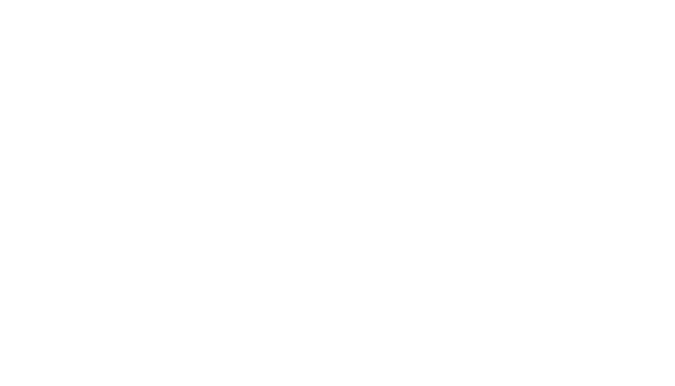

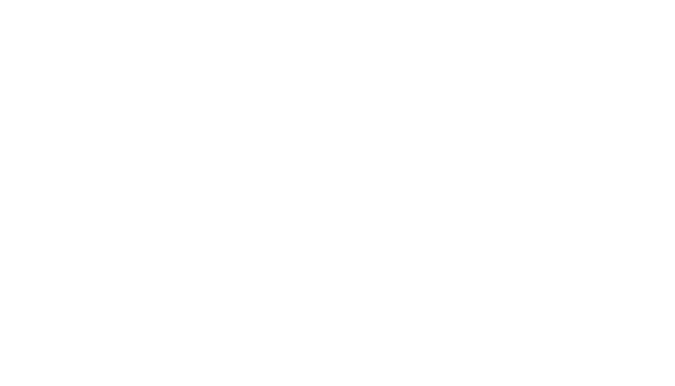

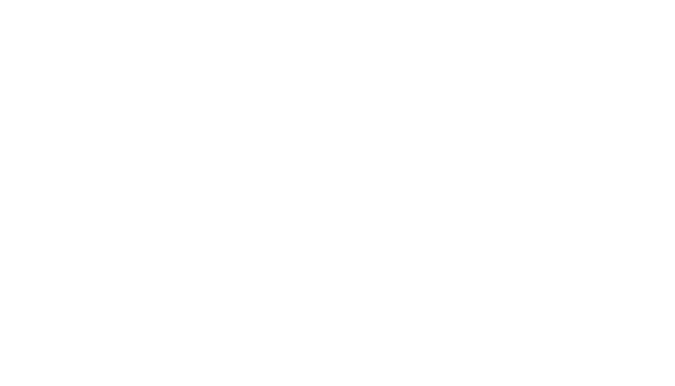

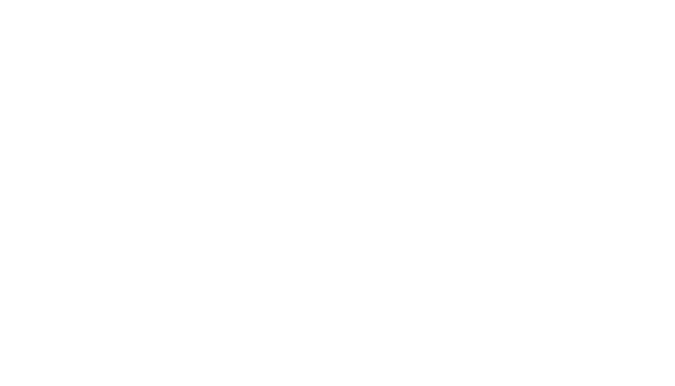

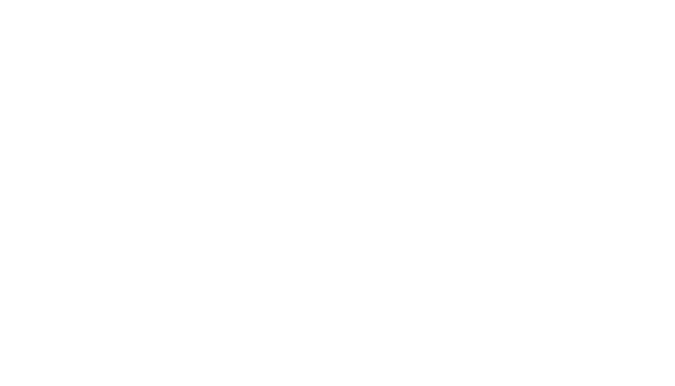

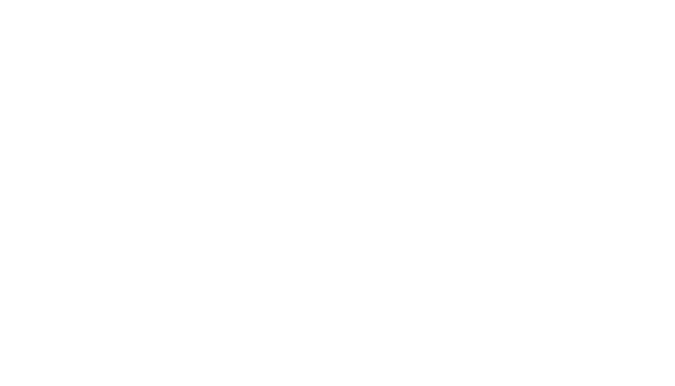

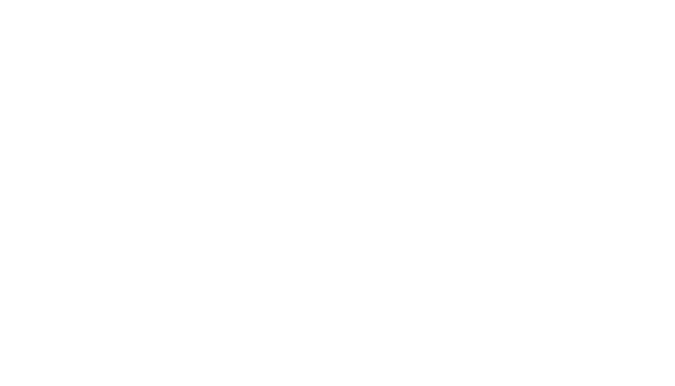

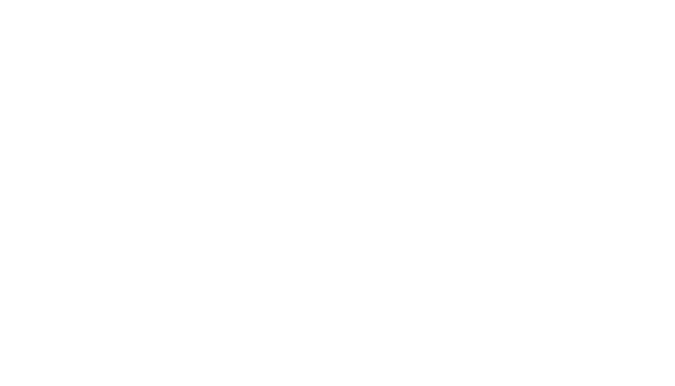

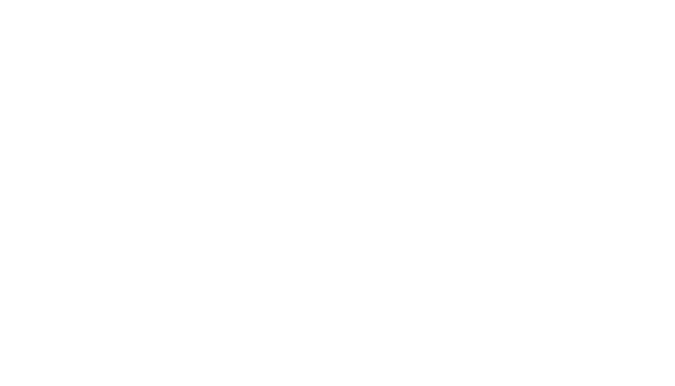

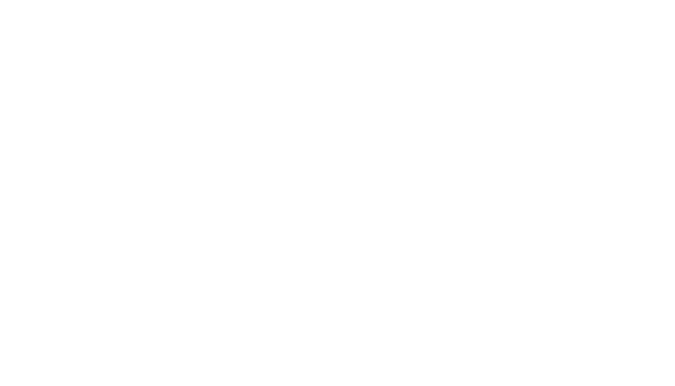

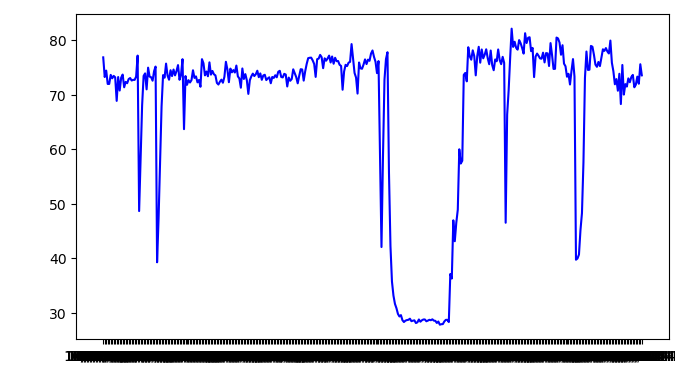

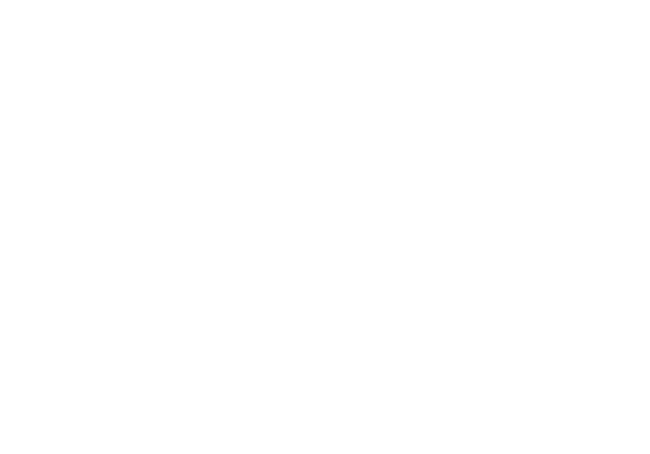

Total execution time: 8.12 seconds


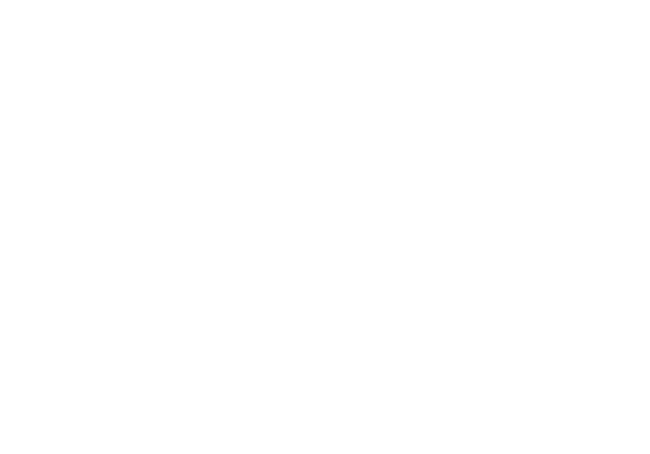

Total execution time: 8.23 seconds


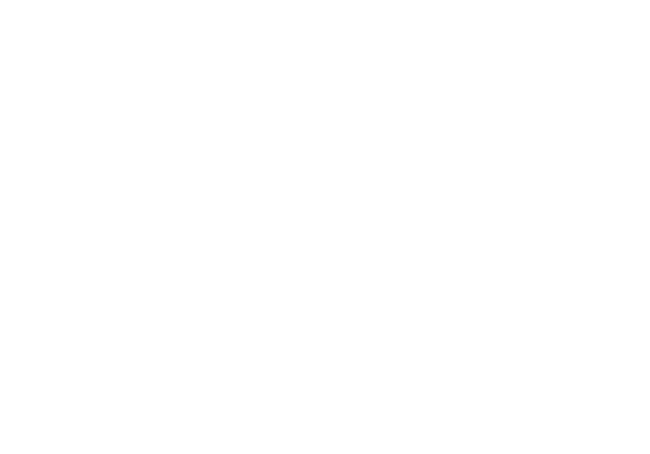

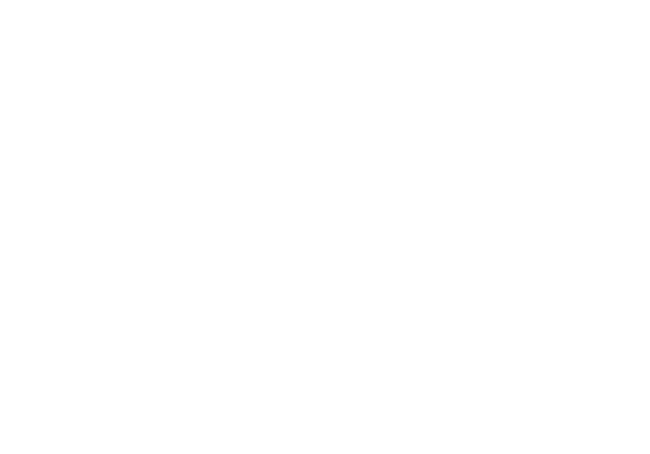

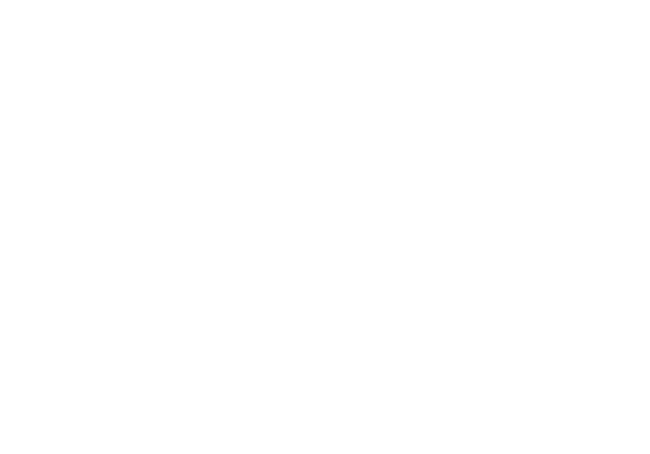

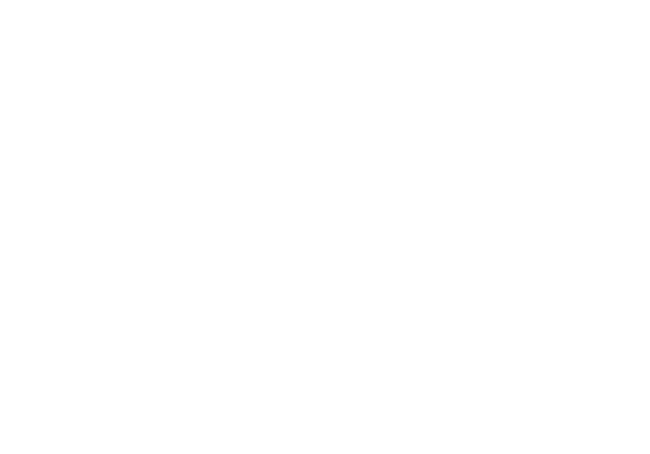

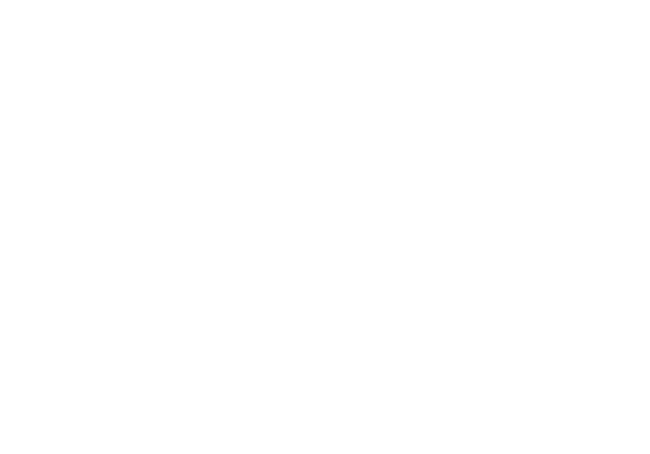

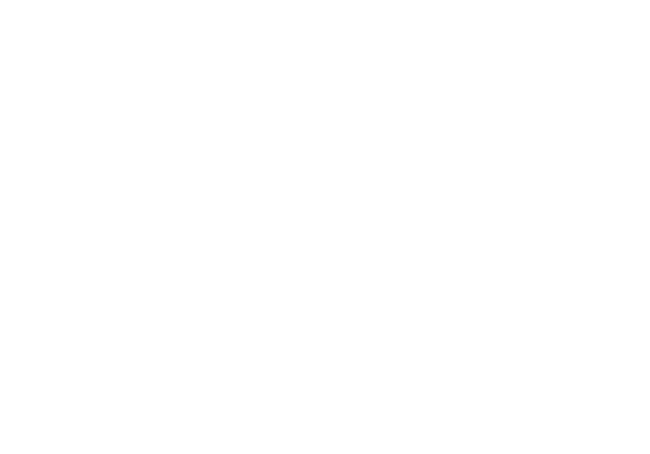

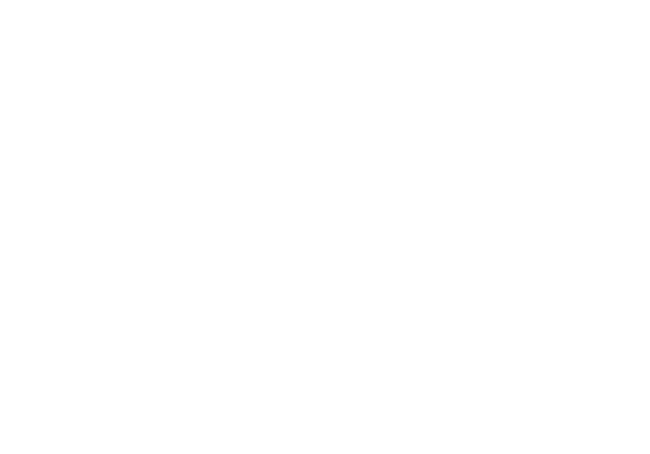

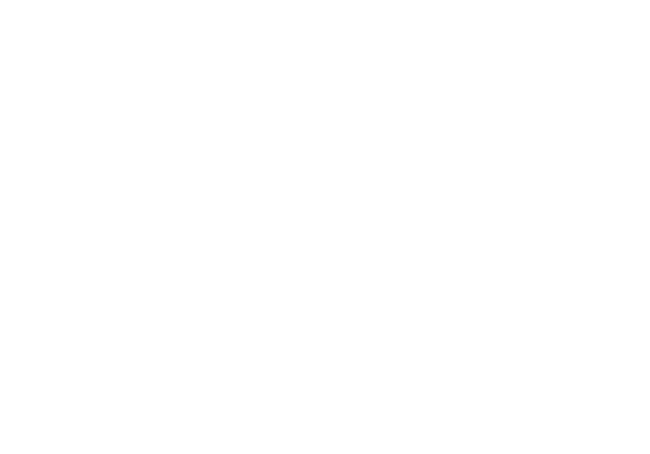

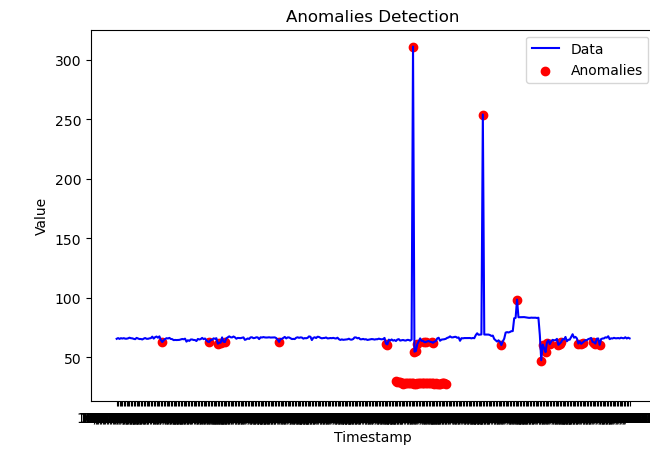

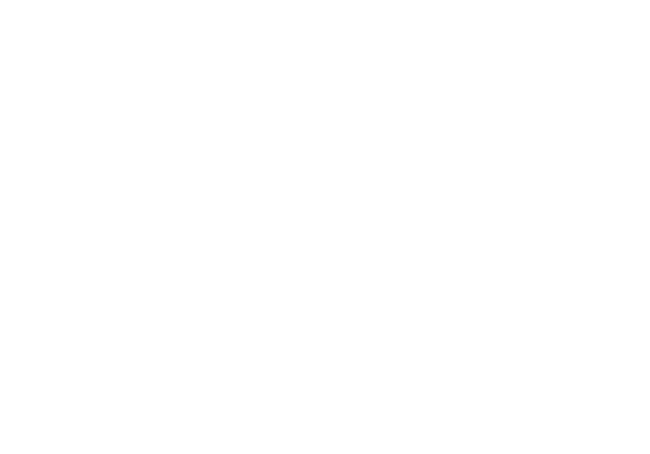

Total execution time: 12.05 seconds


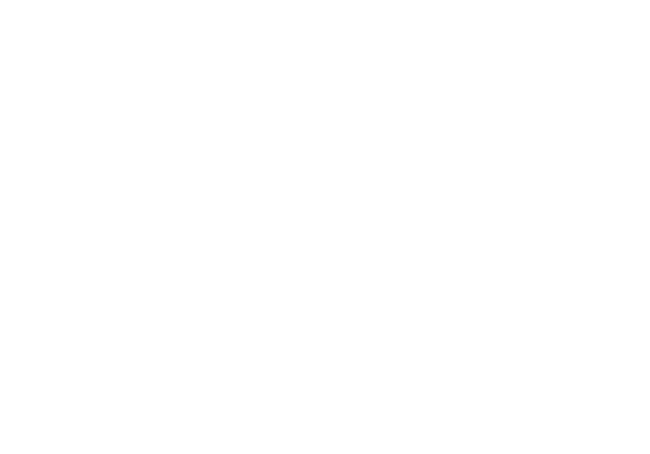

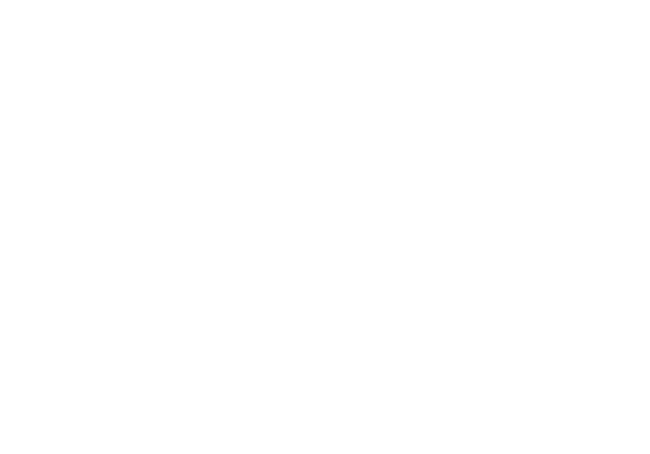

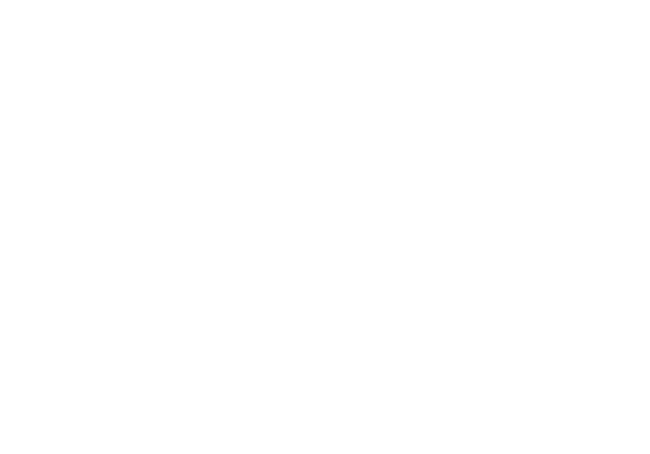

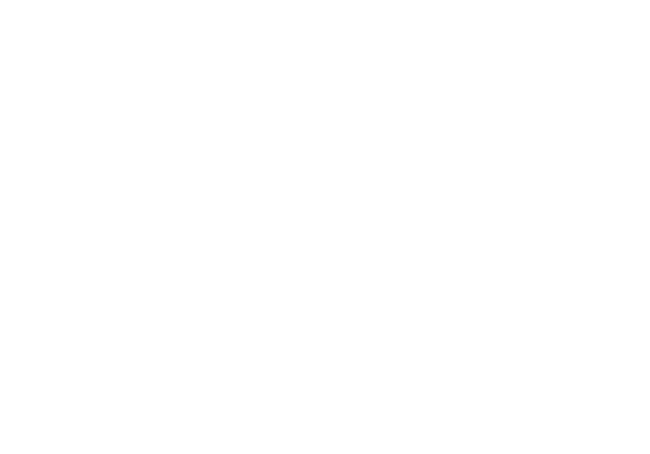

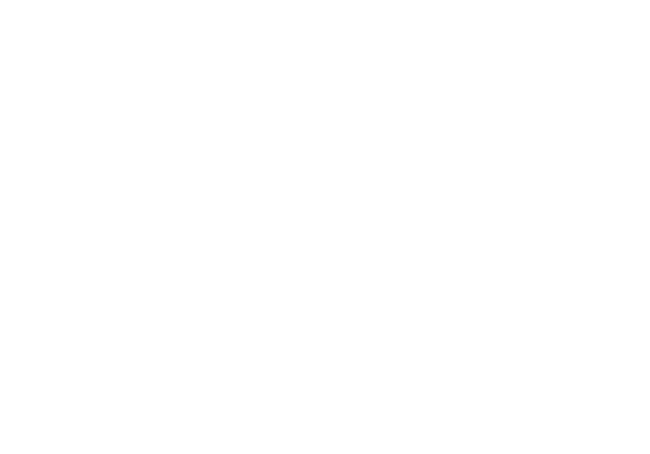

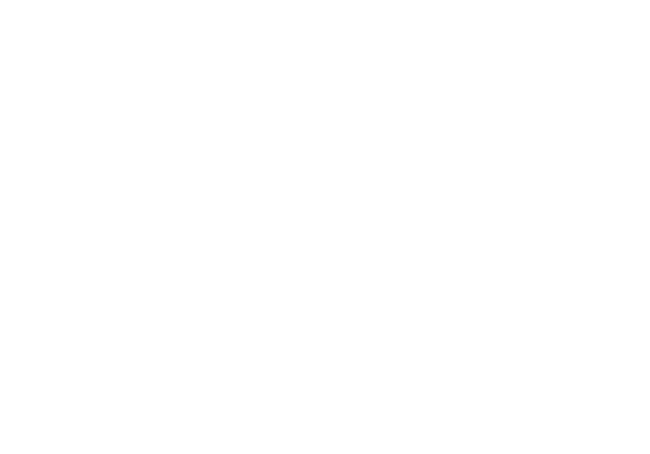

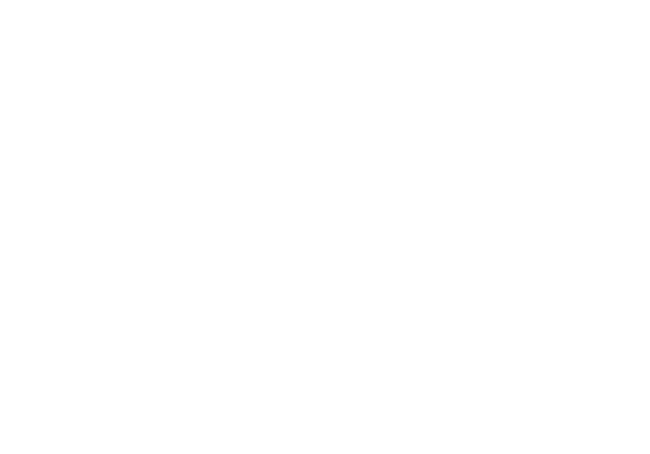

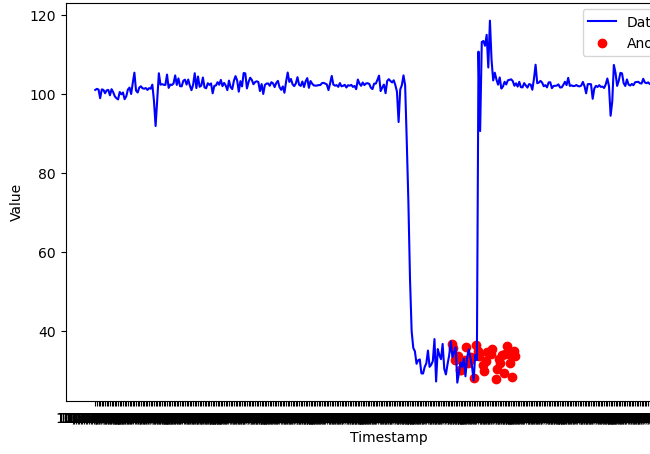

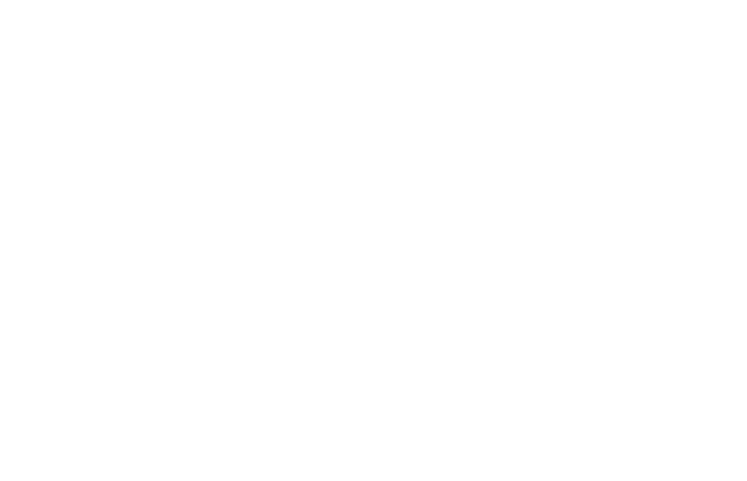

Total execution time: 15.36 seconds


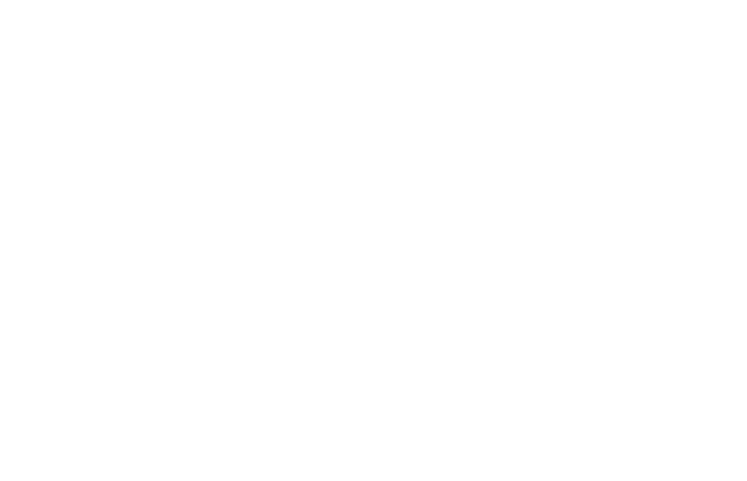

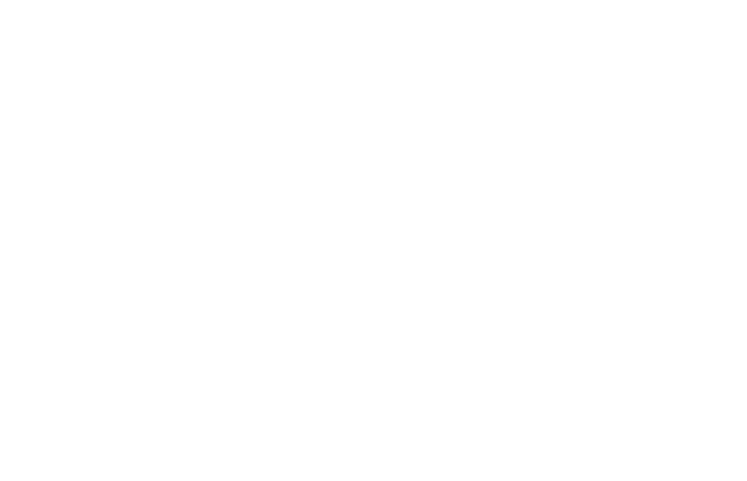

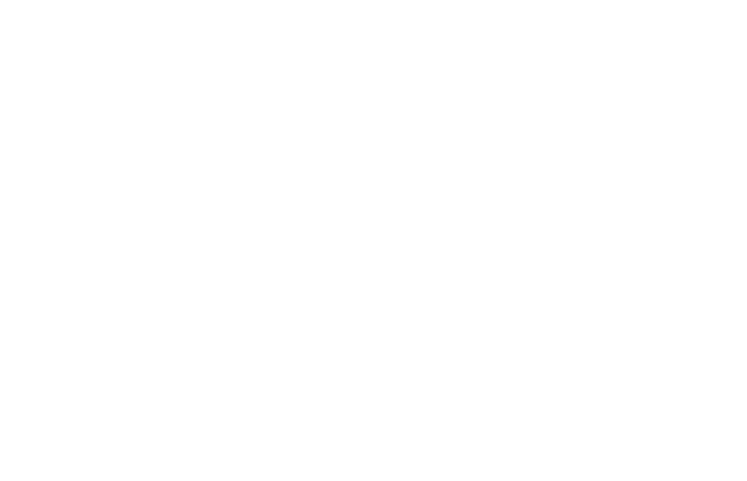

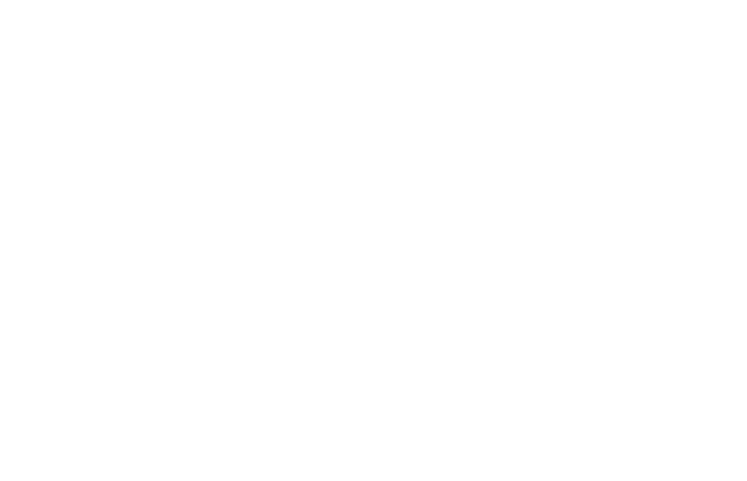

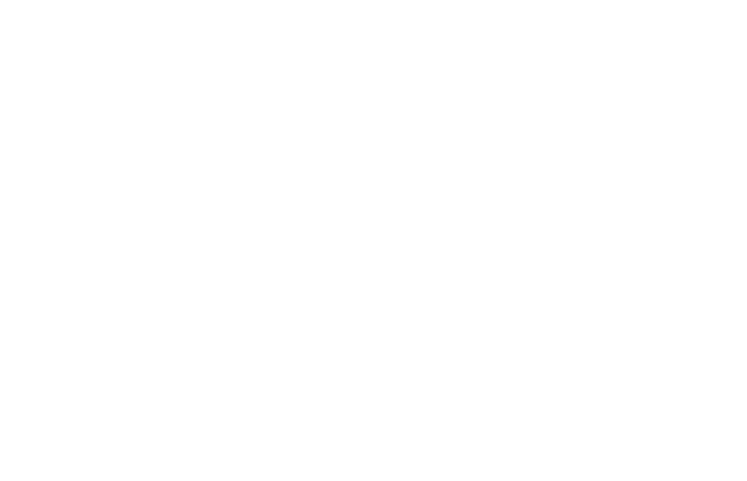

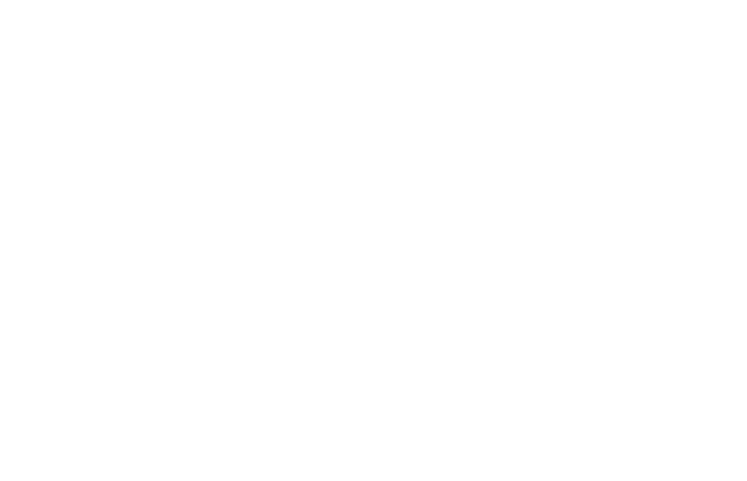

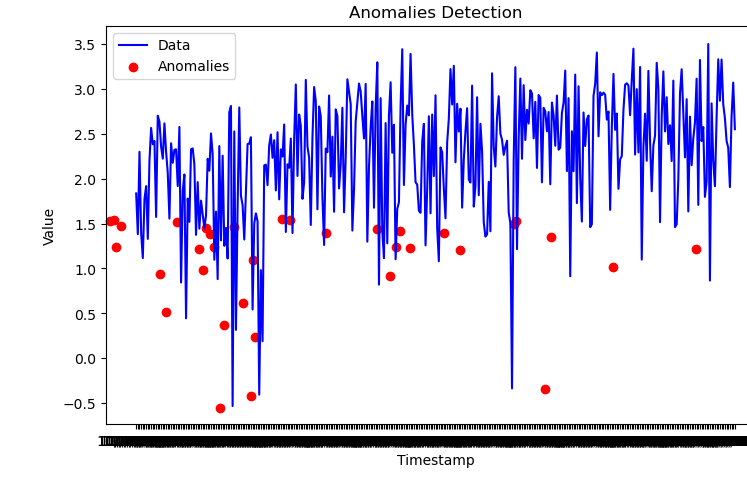

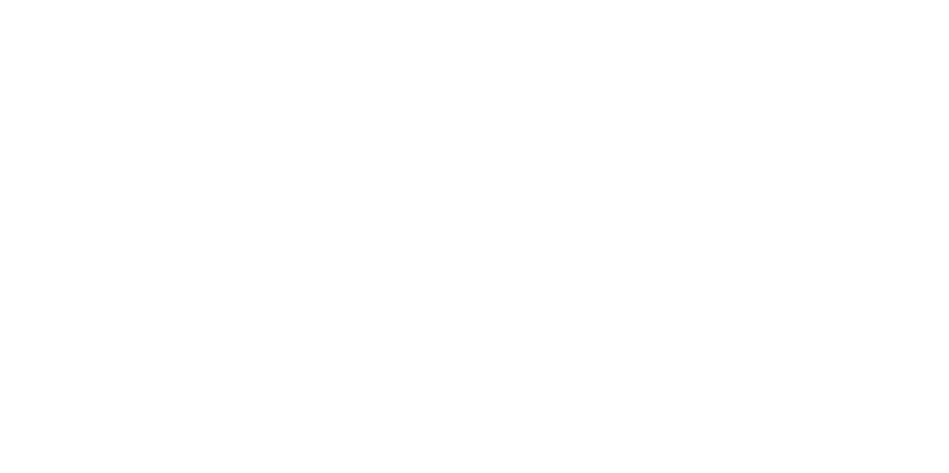

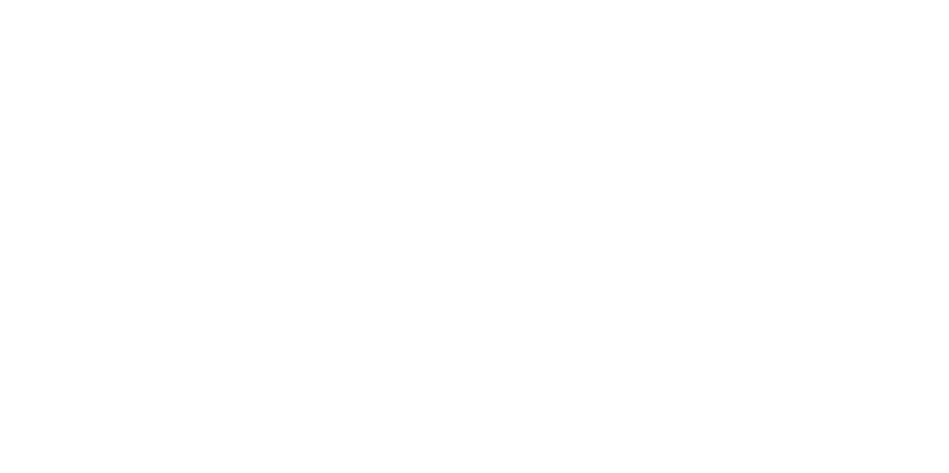

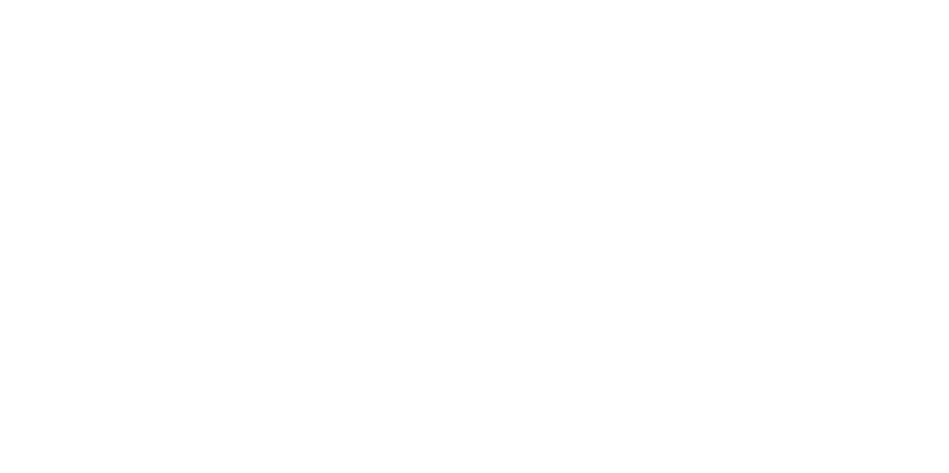

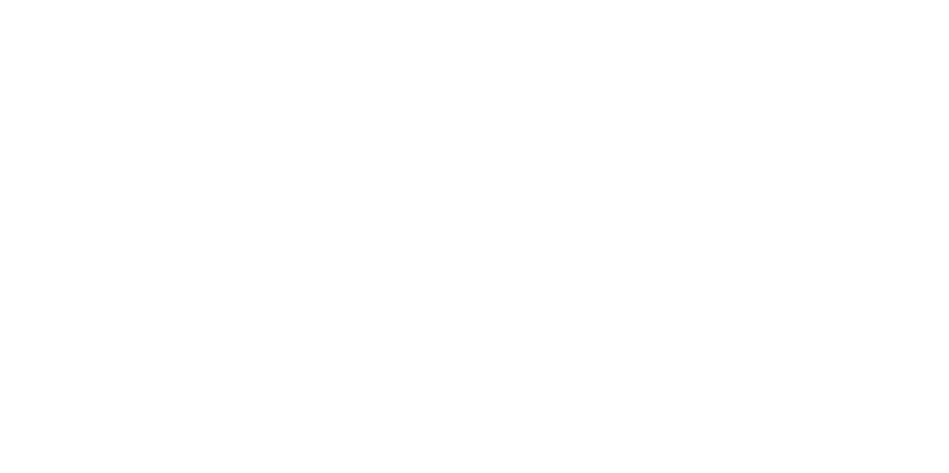

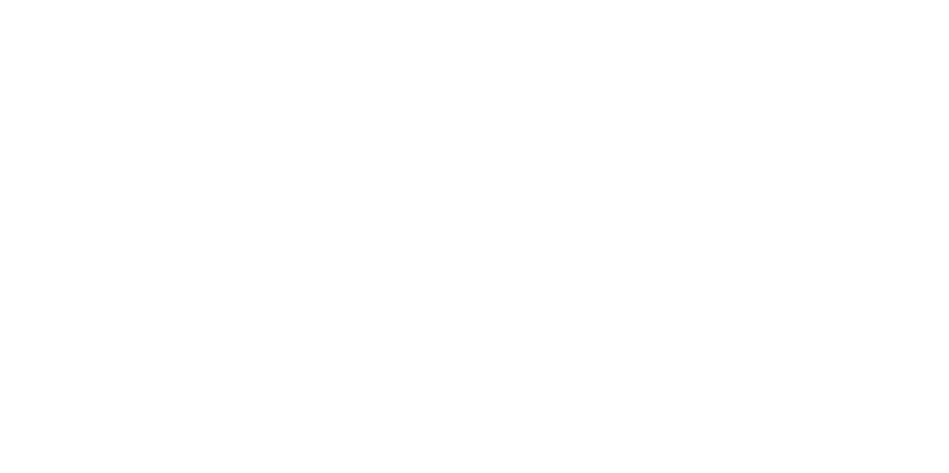

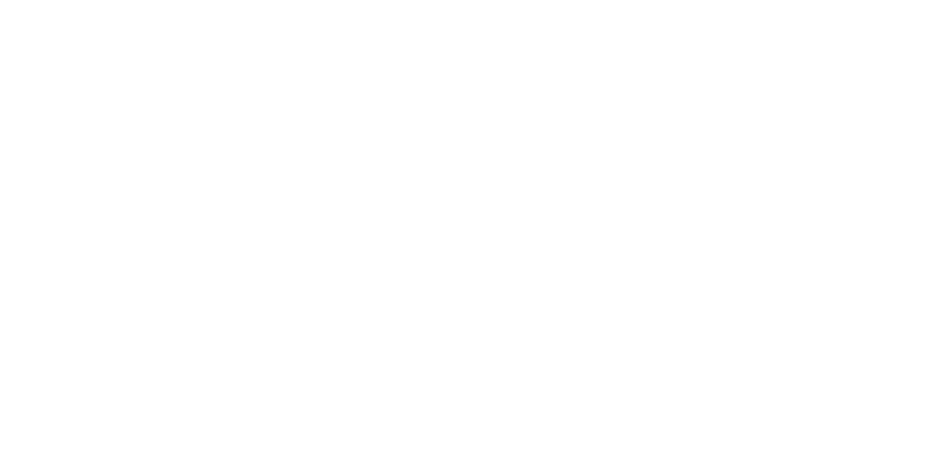

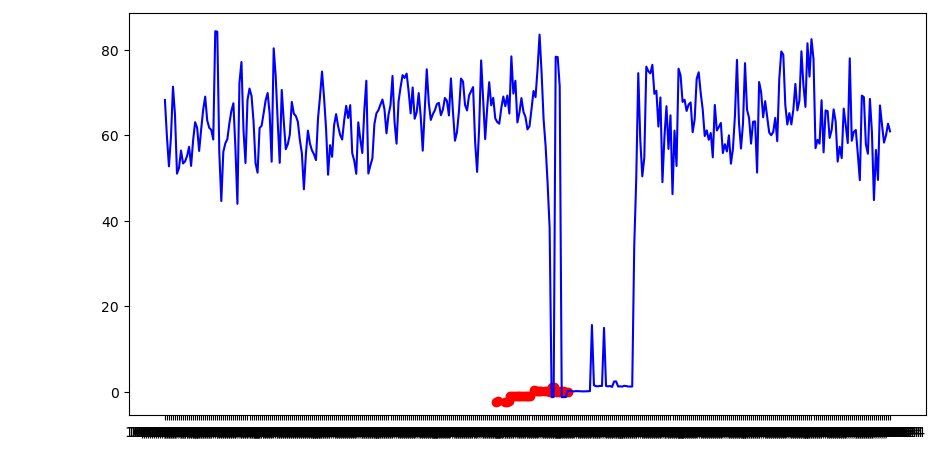

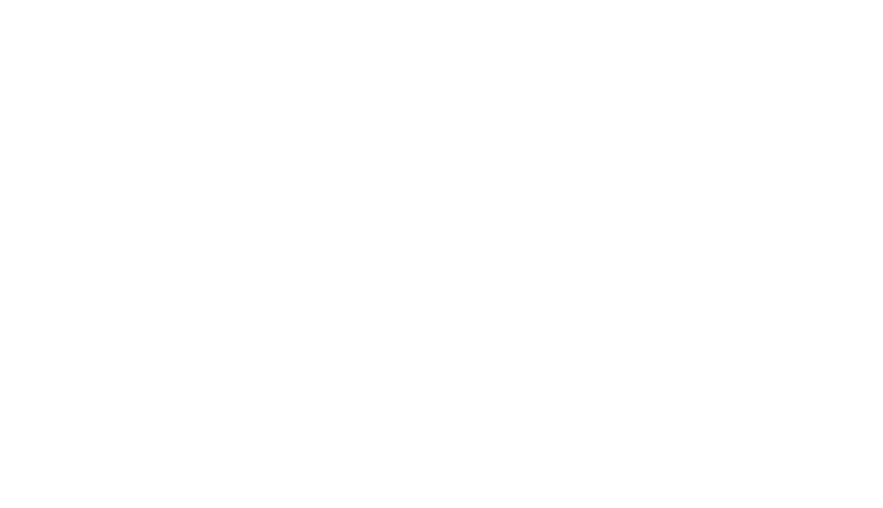

Total execution time: 21.34 seconds


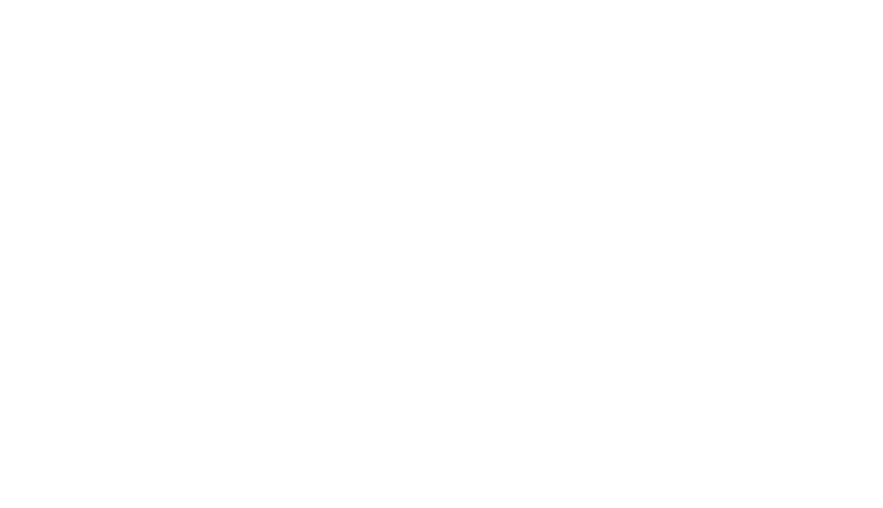

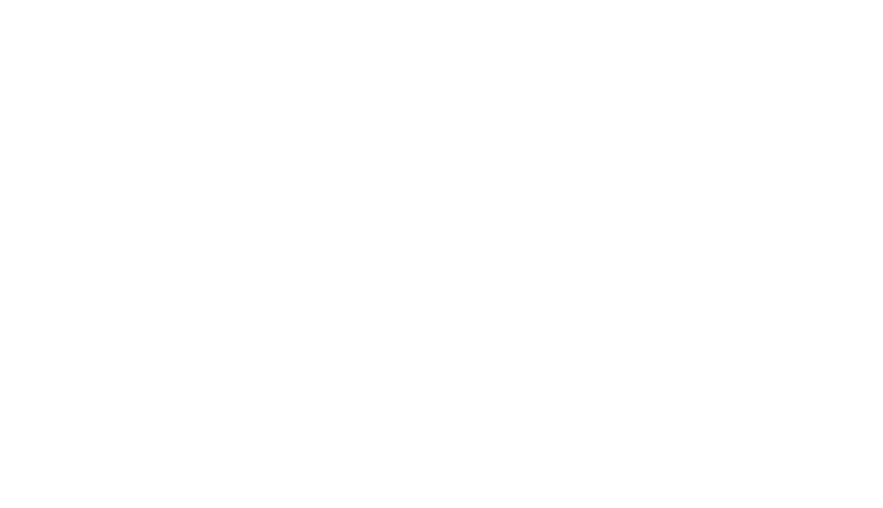

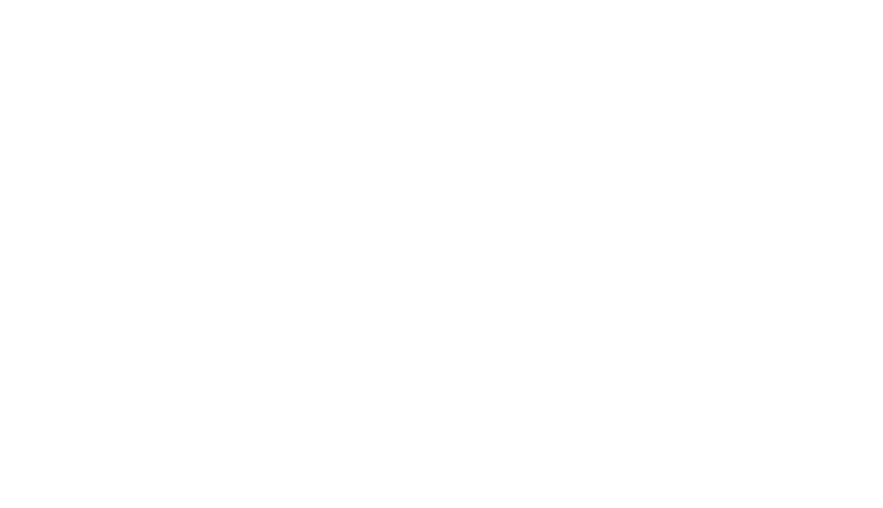

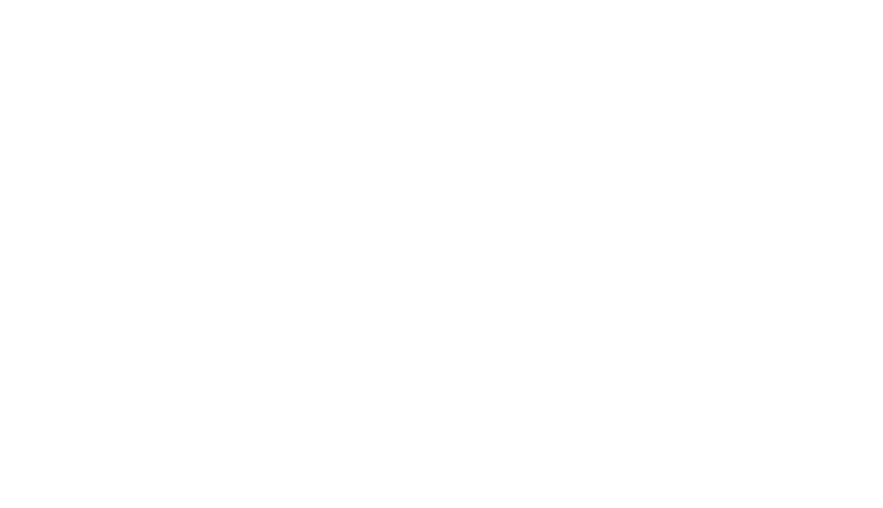

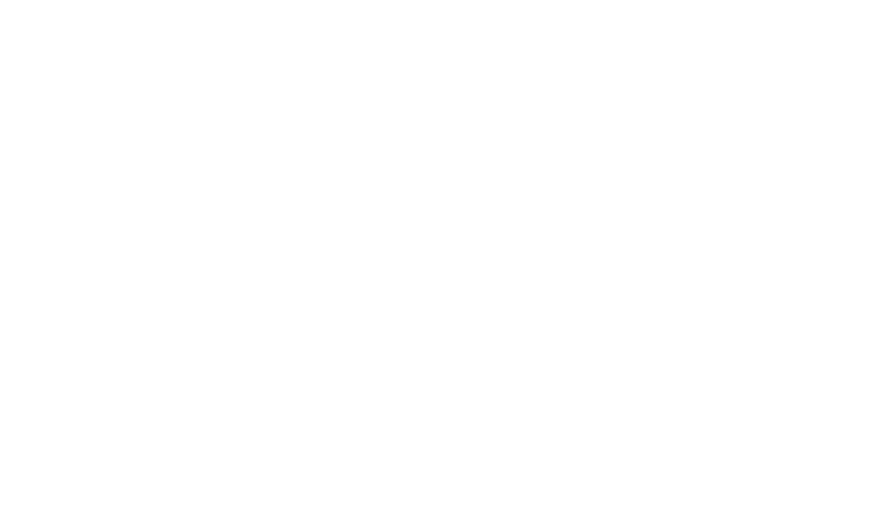

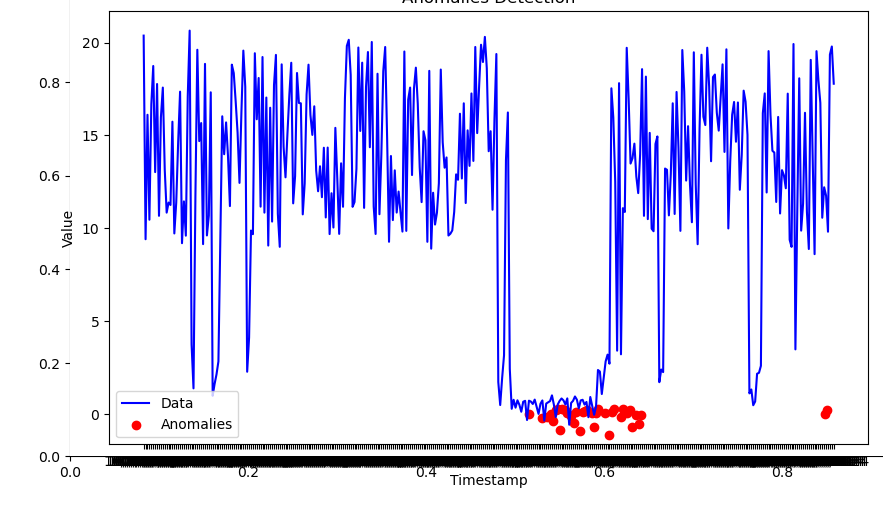

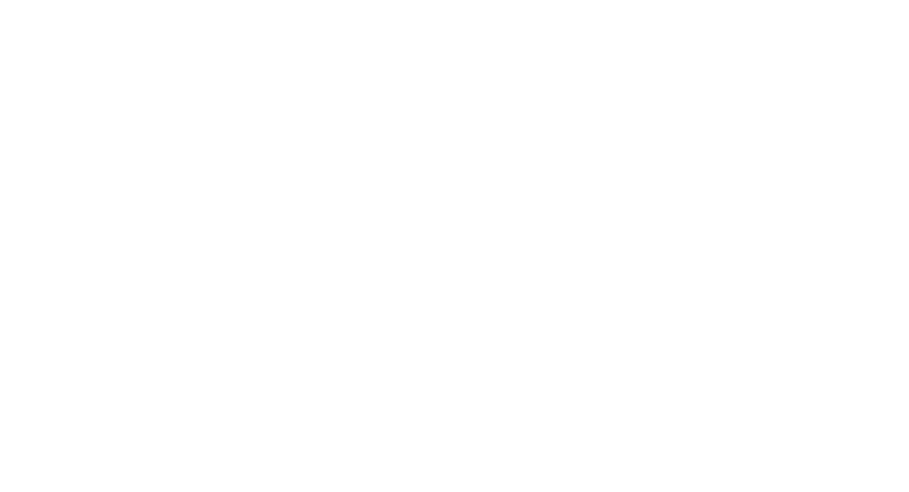

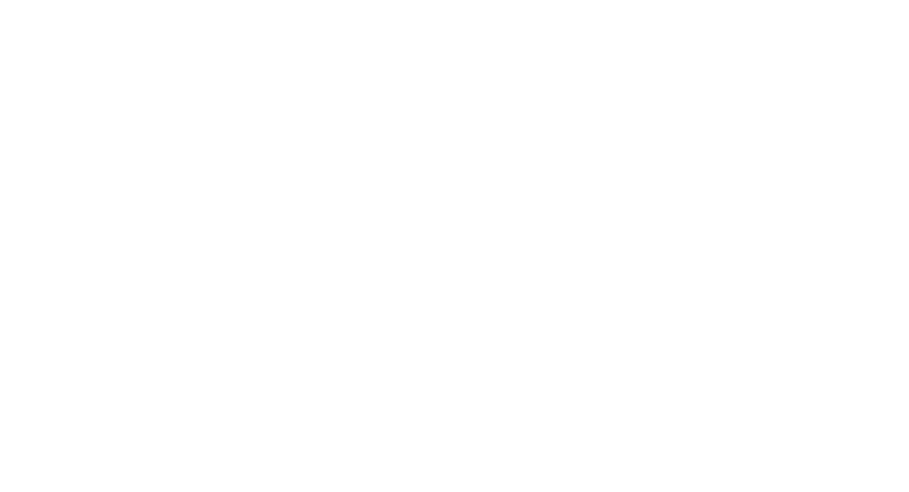

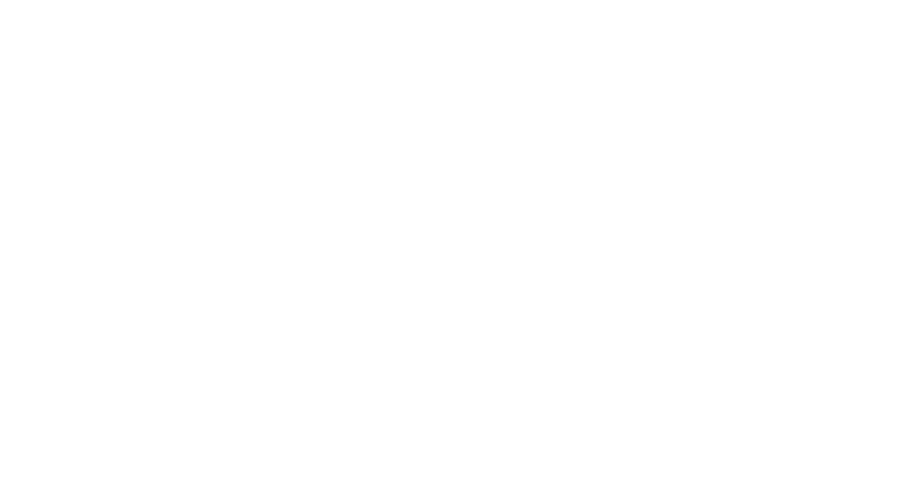

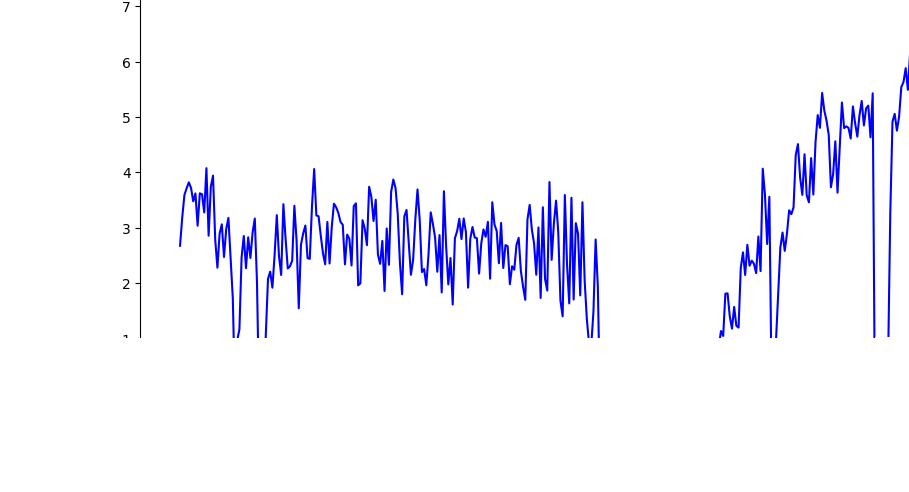

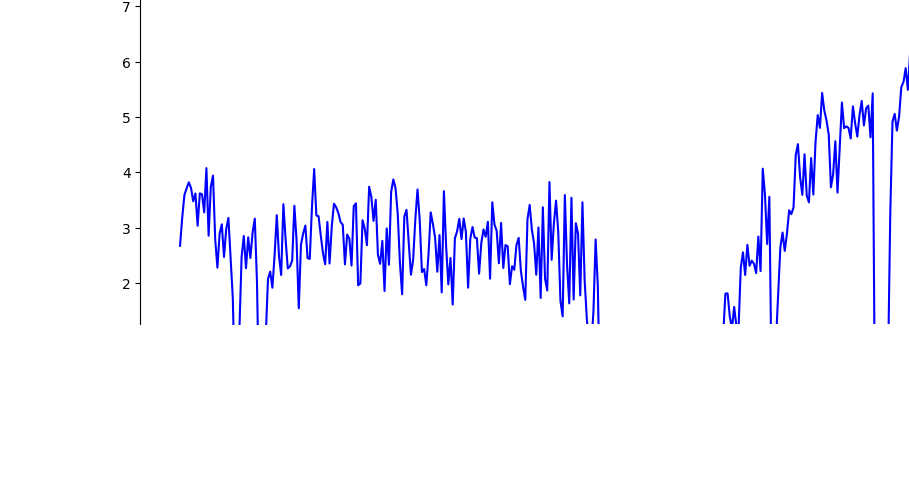

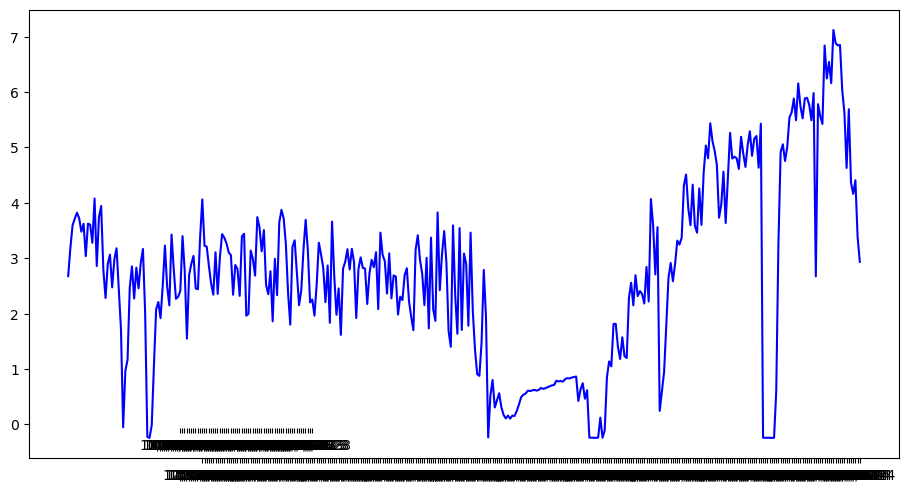

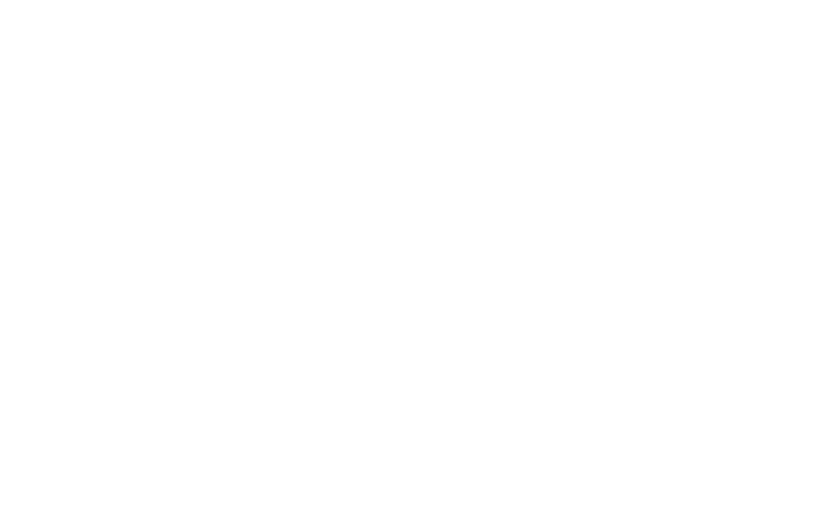

Total execution time: 25.86 seconds


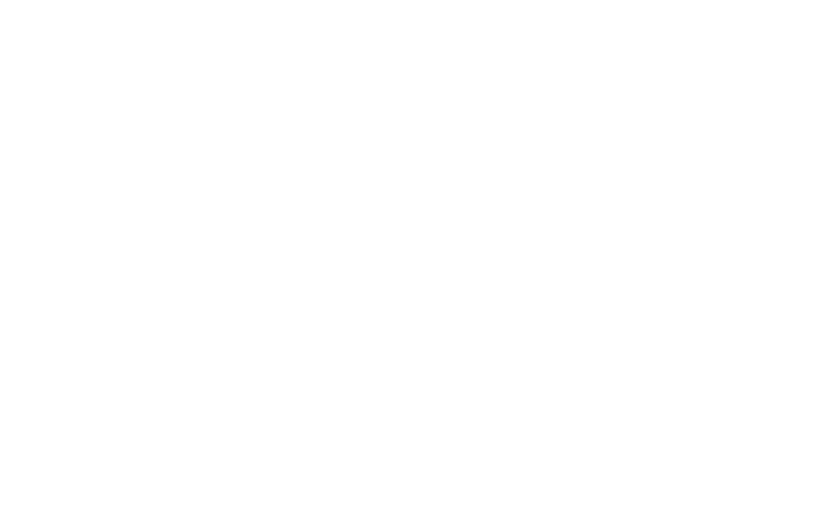

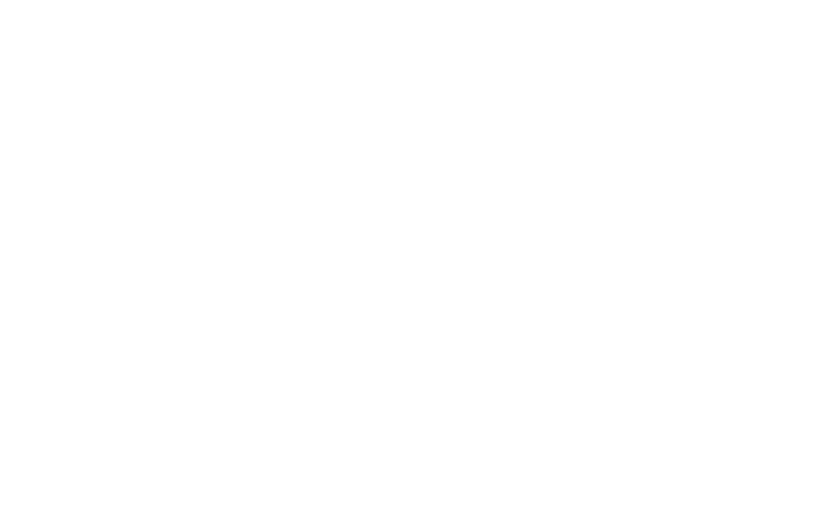

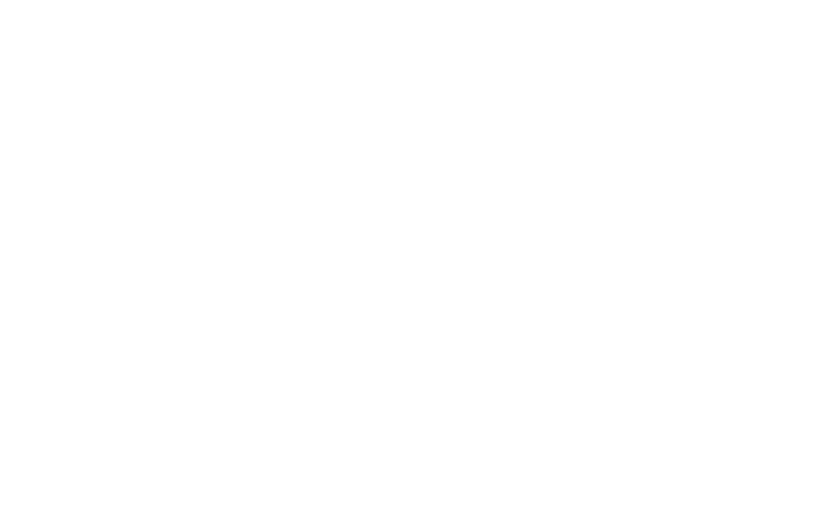

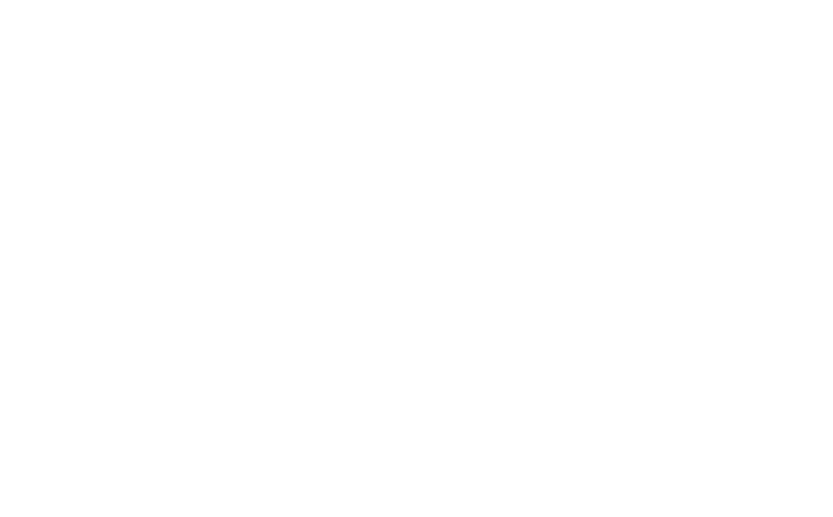

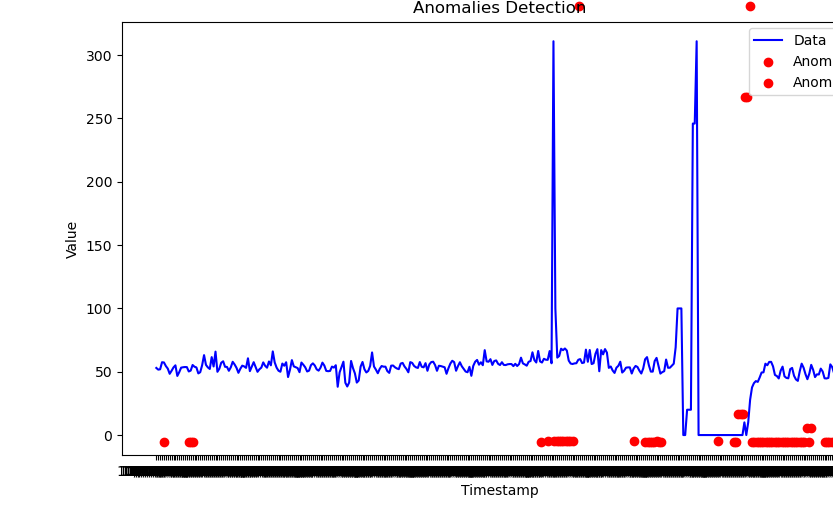

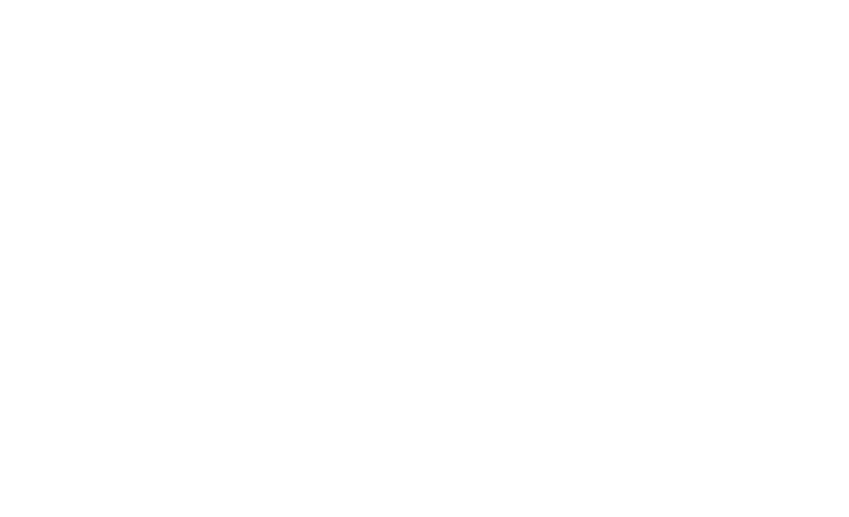

Total execution time: 27.96 seconds


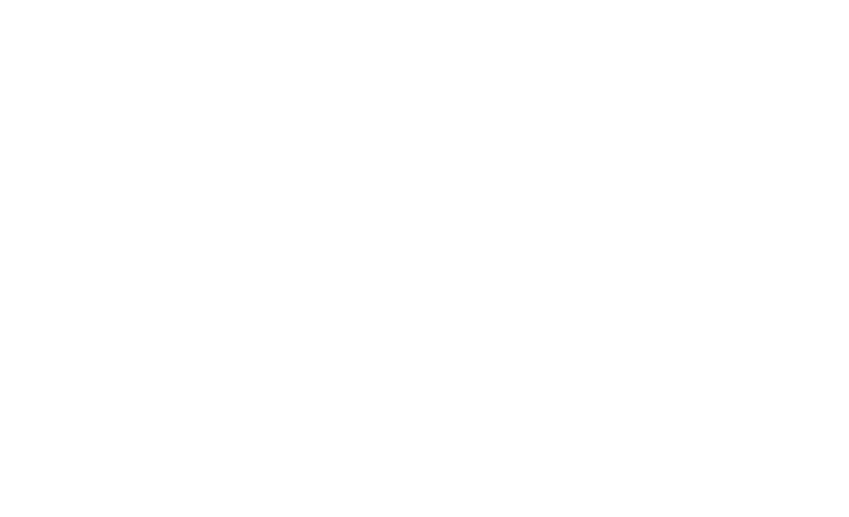

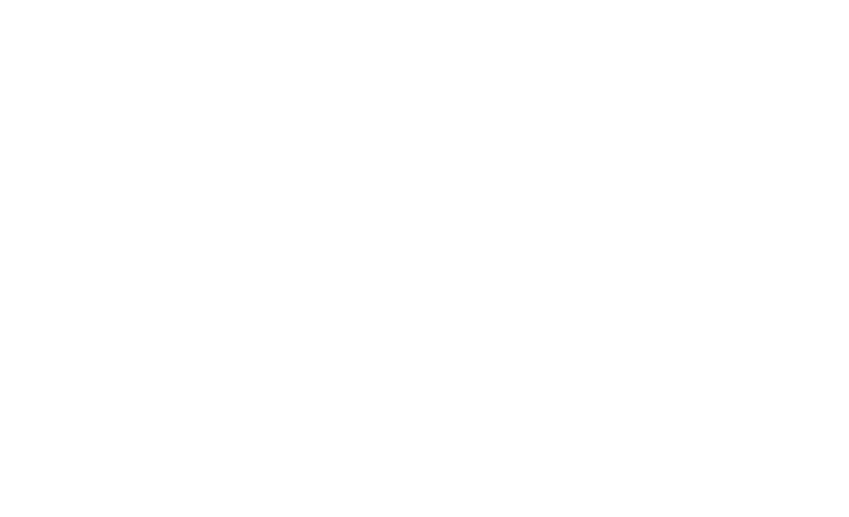

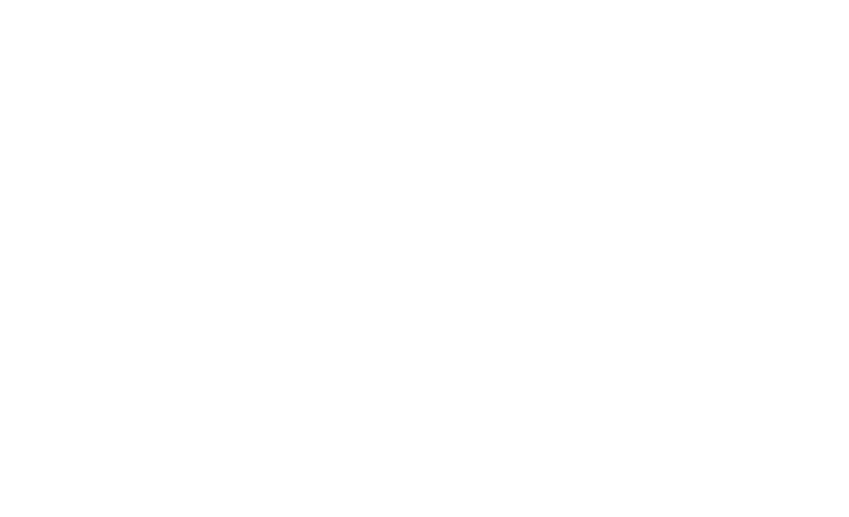

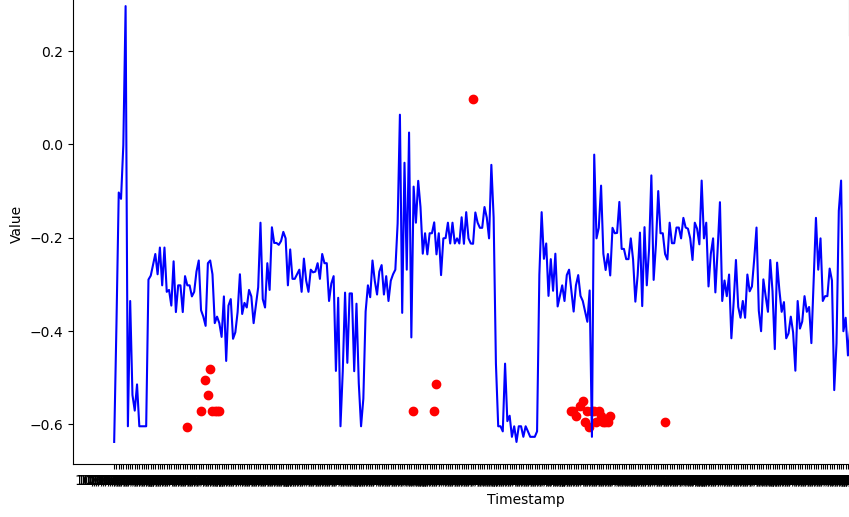

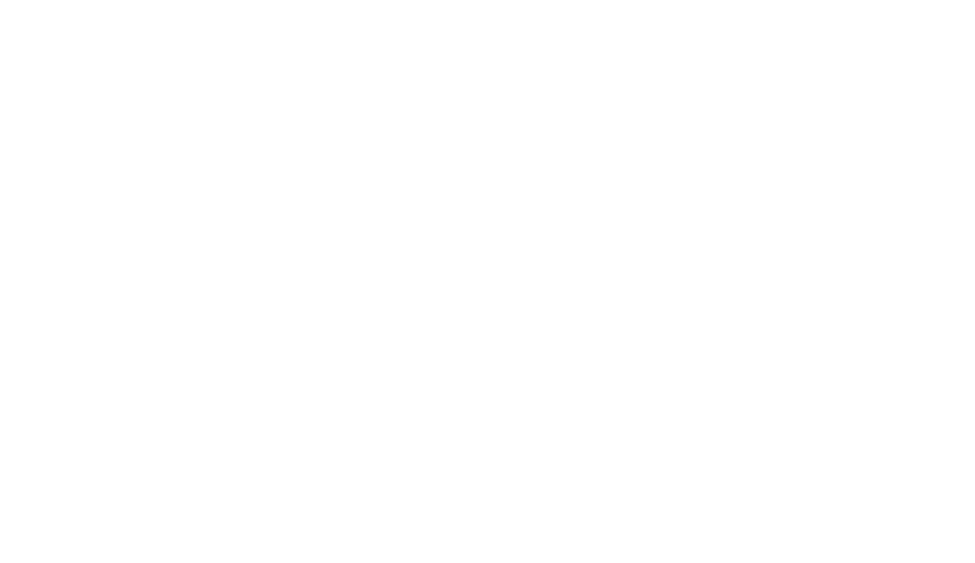

Total execution time: 29.67 seconds


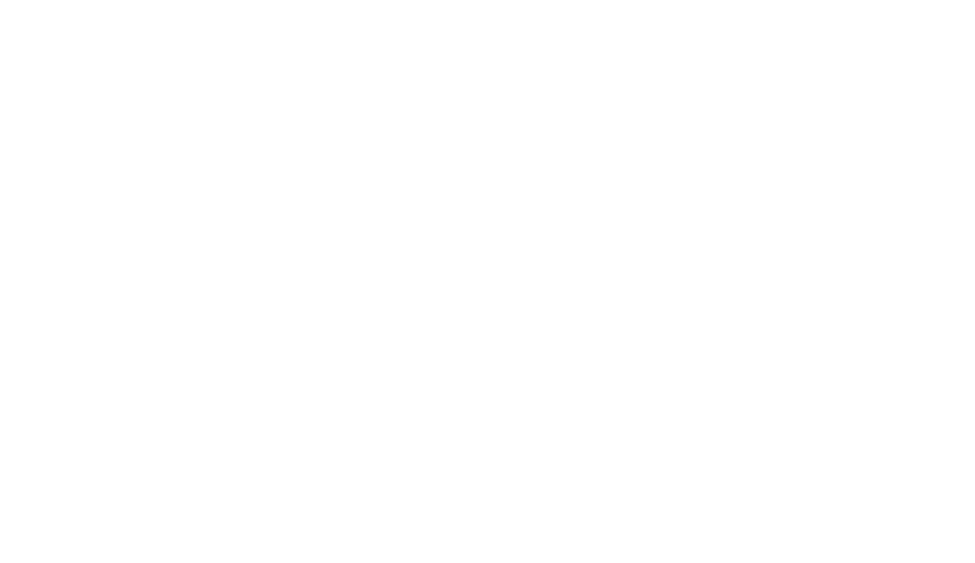

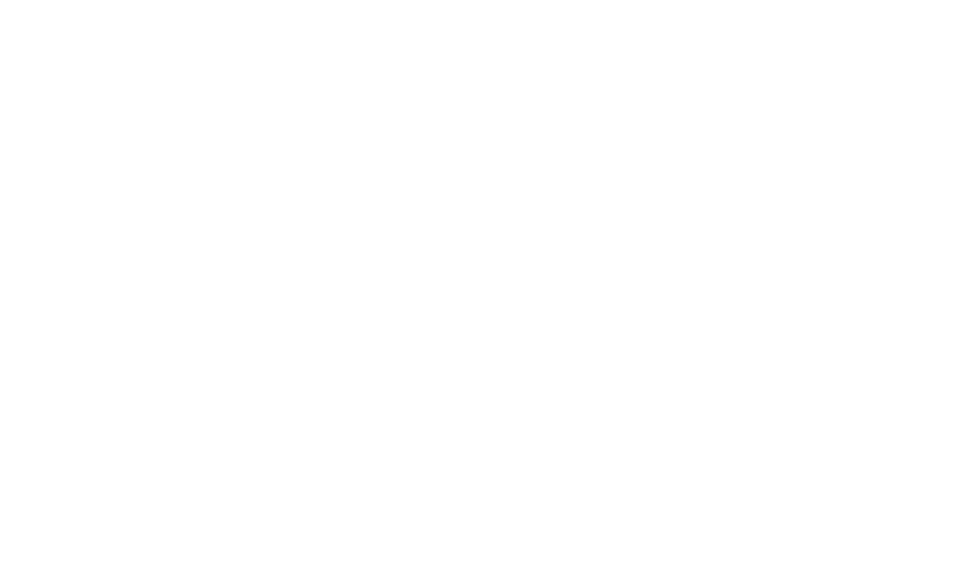

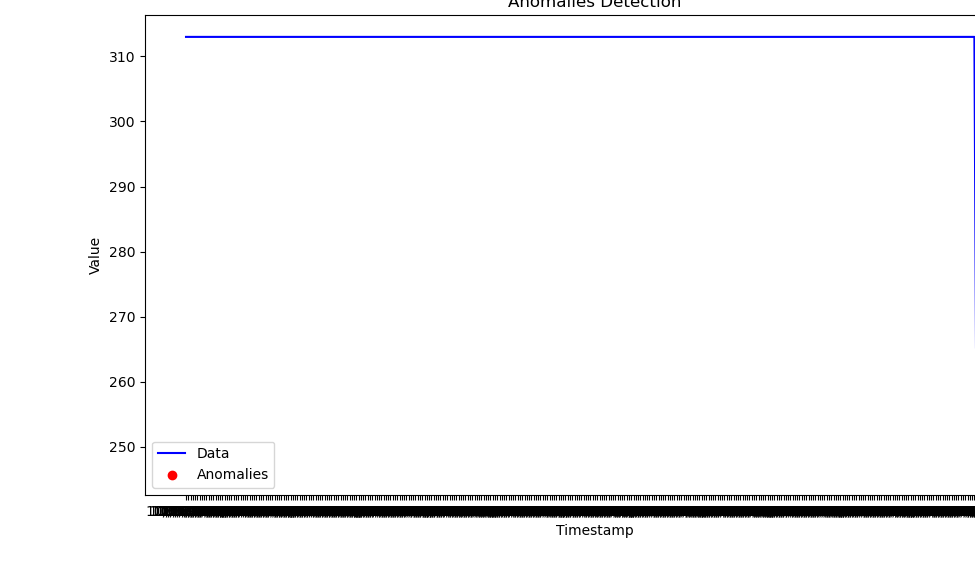

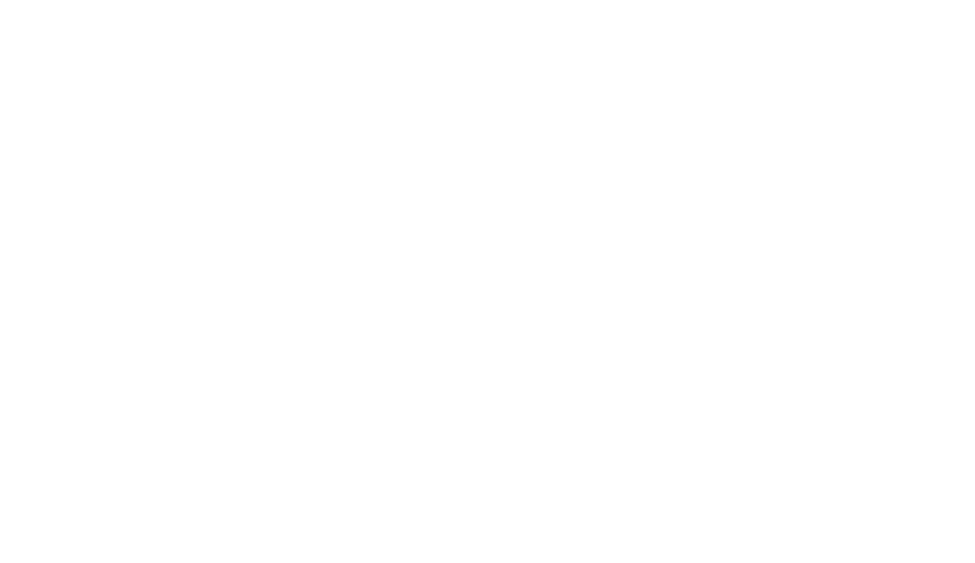

Total execution time: 31.23 seconds


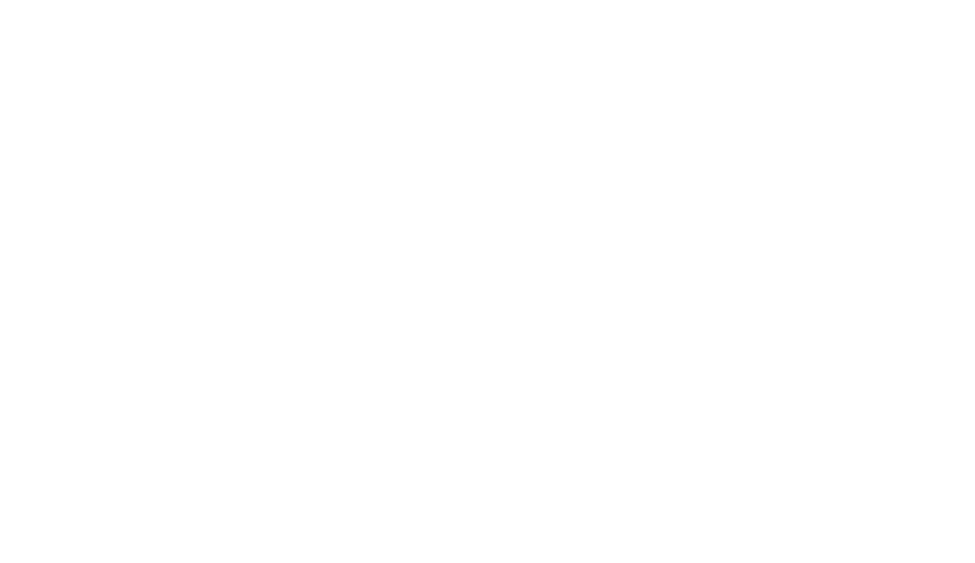

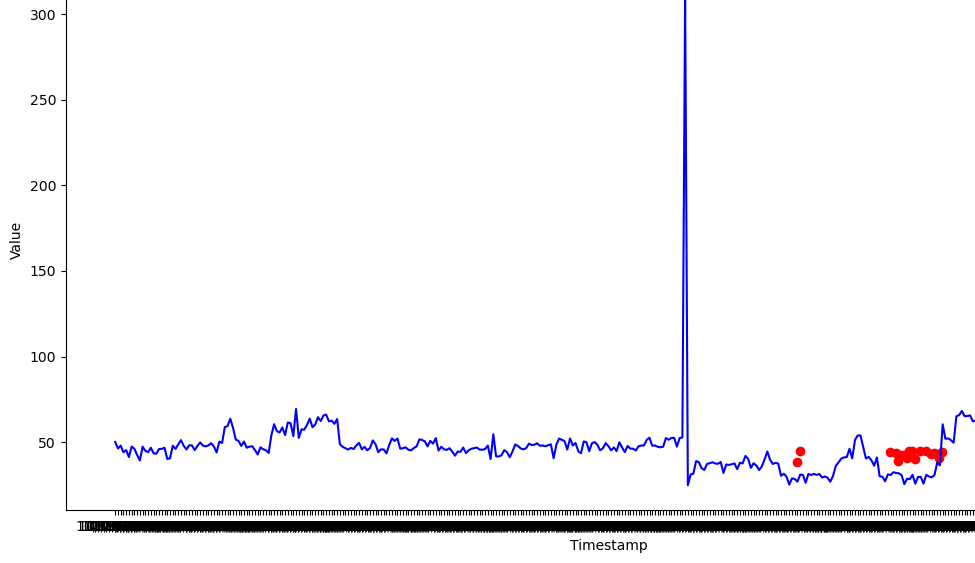

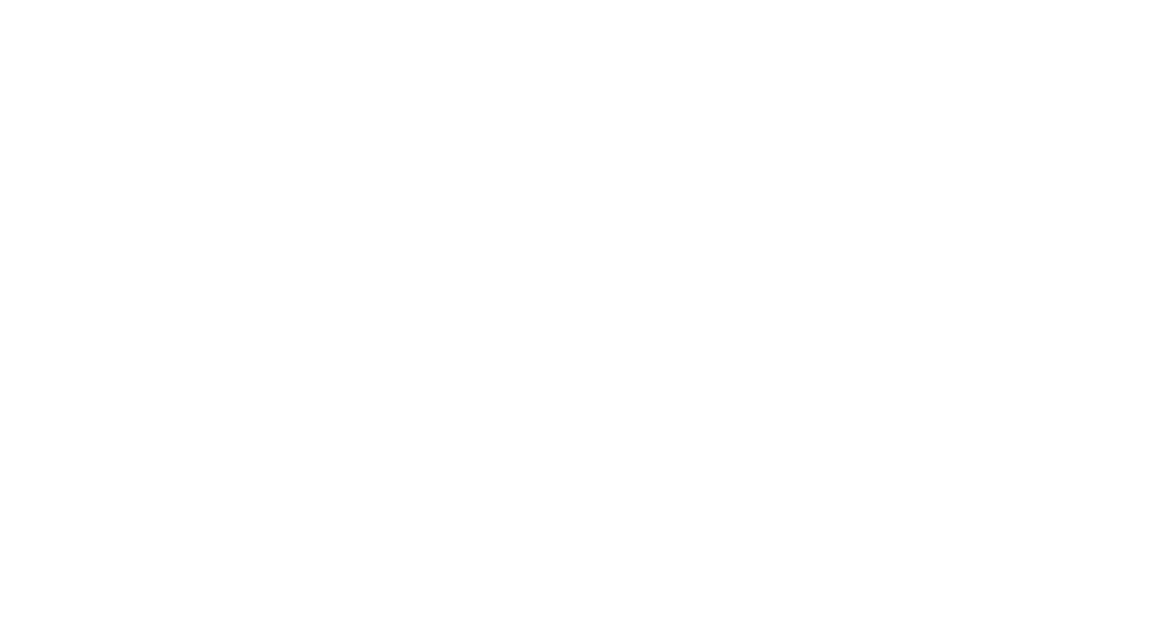

Total execution time: 32.34 seconds


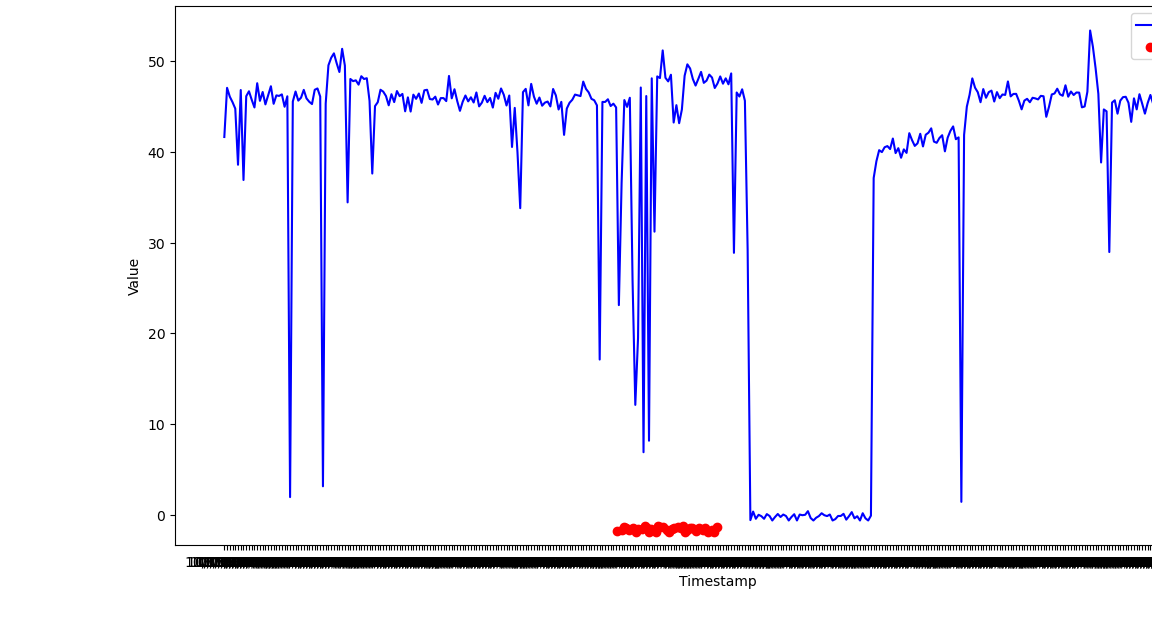

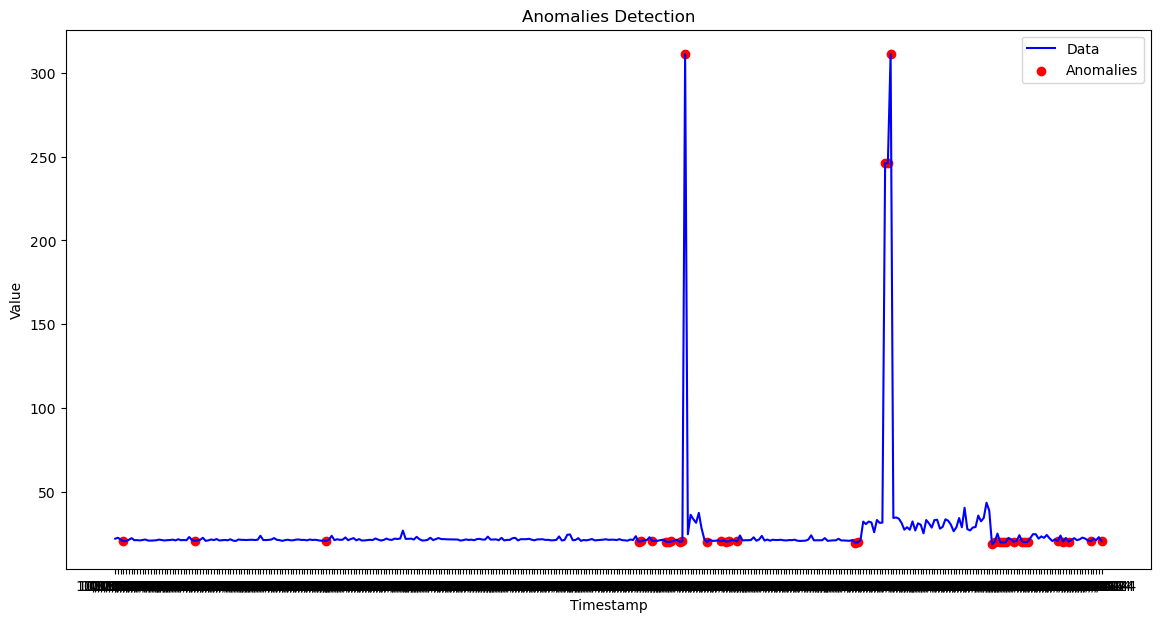

Total execution time: 32.97 seconds
All threads have completed.


In [313]:
# Start all threads
t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()
t7.start()
t8.start()
t9.start()
t10.start()
t11.start()
t12.start()
t13.start()


# # Wait for all threads to complete
t1.join()
t2.join()
t3.join()
t4.join()
t5.join()
t6.join()
t7.join()
t8.join()
t9.join()
t10.join()
t11.join()
t12.join()
t13.join()
print("All threads have completed.")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Timestamp
4/28/2024    30.84139
4/29/2024    29.79383
4/30/2024    29.31989
5/1/2024     29.56985
5/2/2024     28.64387
5/3/2024     28.30527
5/4/2024     28.55601
5/5/2024     28.66196
5/6/2024     28.71318
5/7/2024     28.91835
5/8/2024     28.46322
5/9/2024     28.55214
5/10/2024    28.61758
5/11/2024    28.11959
5/12/2024    28.25024
5/13/2024    28.77311
5/14/2024    28.36274
5/15/2024    28.62212
5/16/2024    28.76821
5/17/2024    28.77619
5/18/2024    28.44498
5/19/2024    28.56448
5/20/2024    28.71447
5/21/2024    28.63447
5/22/2024    28.80011
5/23/2024    28.56684
5/24/2024    28.52183
5/25/2024    28.13339
5/26/2024    28.39786
5/27/2024    27.81936
5/28/2024    27.90661
5/29/2024    27.92899
5/30/2024    28.40541
5/31/2024    28.70539
6/1/2024     28.70826
6/2/2024     28.29838
Name: Value, dtype: float64


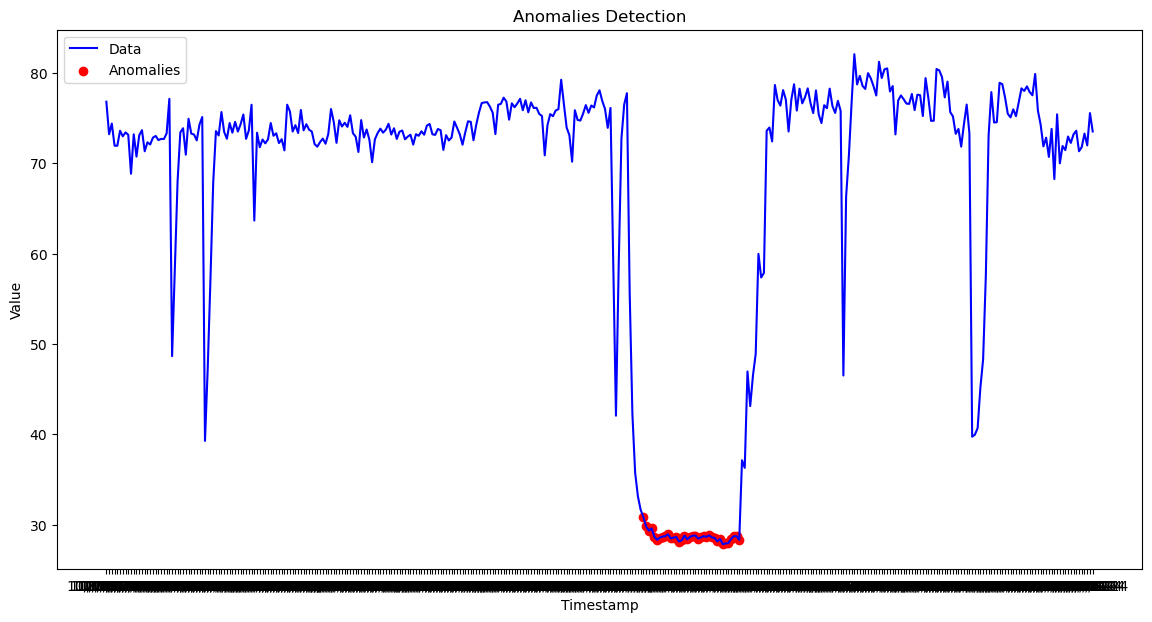

Total execution time: 0.66 seconds


In [314]:
t1 = threading.Thread(target=model_inference, args=('./autoencoder/9914TT106A.PV_model.h5', './data/9914TT106A.PV.csv'))
t1.start()
t1.join()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Timestamp
4/28/2024    30.84139
4/29/2024    29.79383
4/30/2024    29.31989
5/1/2024     29.56985
5/2/2024     28.64387
5/3/2024     28.30527
5/4/2024     28.55601
5/5/2024     28.66196
5/6/2024     28.71318
5/7/2024     28.91835
5/8/2024     28.46322
5/9/2024     28.55214
5/10/2024    28.61758
5/11/2024    28.11959
5/12/2024    28.25024
5/13/2024    28.77311
5/14/2024    28.36274
5/15/2024    28.62212
5/16/2024    28.76821
5/17/2024    28.77619
5/18/2024    28.44498
5/19/2024    28.56448
5/20/2024    28.71447
5/21/2024    28.63447
5/22/2024    28.80011
5/23/2024    28.56684
5/24/2024    28.52183
5/25/2024    28.13339
5/26/2024    28.39786
5/27/2024    27.81936
5/28/2024    27.90661
5/29/2024    27.92899
5/30/2024    28.40541
5/31/2024    28.70539
6/1/2024     28.70826
6/2/2024     28.29838
Name: Value, dtype: float64


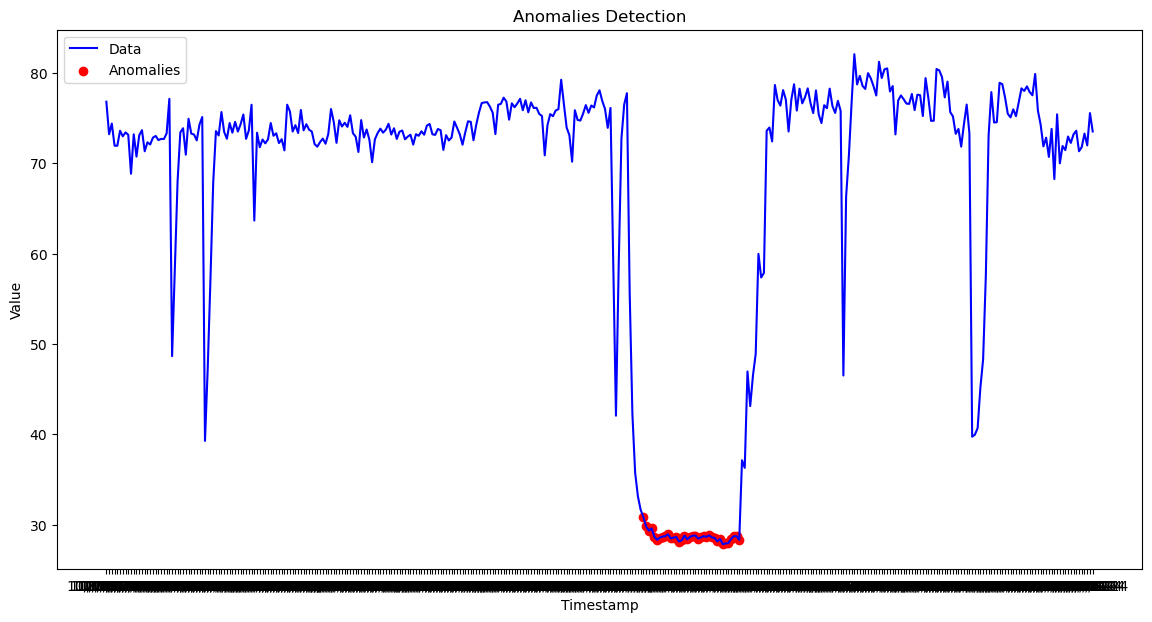

Total execution time: 0.61 seconds


In [315]:
t2 = threading.Thread(target=model_inference, args=('./autoencoder/9914TT106A.PV_model.h5', './data/9914TT106A.PV.csv'))
t2.start()
t12.join()

Anomaly Indices: [ 2875  2876  2877 ... 21584 21585 21586]
Anomaly Values: [69.87179565 69.23493195 70.00915527 ... 81.86303711 82.23442841
  1.12942696]


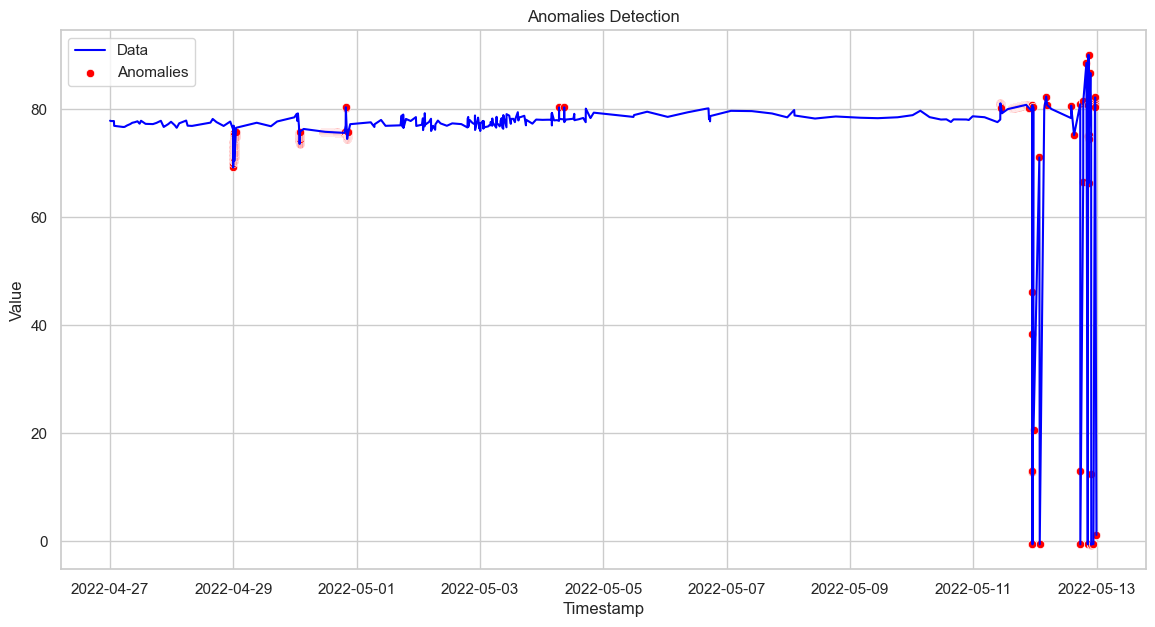

In [31]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is a DataFrame with a datetime index and a 'Value' column
# Detect anomalies based on the threshold
anomalies = reconstruction_error > threshold

# Print the anomalies
anomaly_indices = np.where(anomalies)[0]
anomaly_values = data.iloc[anomaly_indices]['Value']
print(f"Anomaly Indices: {anomaly_indices}")
print(f"Anomaly Values: {anomaly_values.values}")

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a new figure
plt.figure(figsize=(14, 7))

# Plot the data
sns.lineplot(x=data.index, y=data['Value'], label='Data', color='blue')

# Highlight anomalies
sns.scatterplot(x=data.iloc[anomaly_indices].index, y=anomaly_values, color='red', label='Anomalies', marker='o')

# Add labels and title
plt.title('Anomalies Detection')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

# Save the plot
plot_filename = f'{file_name}_anomalies_seaborn.png'
plt.savefig(plot_filename)

# Show the plot
plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess your dataset
data = pd.read_csv('./Inputs/7951_TV021A.OUT.csv')
data.columns = ['Timestamp', 'Value']
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M')
data.set_index('Timestamp', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data['Value_scaled'] = scaler.fit_transform(data[['Value']])

X_train = data['Value_scaled'].values.reshape(-1, 1)

# Define the autoencoder
def build_autoencoder():
    input_layer = layers.Input(shape=(1,))
    encoder = layers.Dense(16, activation="relu")(input_layer)
    encoder = layers.Dense(8, activation="relu")(encoder)
    encoder = layers.Dense(4, activation="relu")(encoder)
    
    decoder = layers.Dense(8, activation="relu")(encoder)
    decoder = layers.Dense(16, activation="relu")(decoder)
    output_layer = layers.Dense(1, activation="sigmoid")(decoder)
    
    autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer="adam", loss="mse")
    return autoencoder

# Build the autoencoder model
autoencoder = build_autoencoder()

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=128, validation_split=0.1, verbose=1)

# Reconstruct the data
reconstructed_data = autoencoder.predict(X_train)

# Calculate reconstruction error
reconstruction_error = tf.keras.losses.mse(X_train, reconstructed_data).numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 90)

# Detect anomalies
anomalies = reconstruction_error > threshold

# Print first 10 anomalies
print(anomalies[:10])
print("Threshold:", threshold)


autoencoder.save('autoencoder_model.h5')

Epoch 1/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - loss: 0.0958 - val_loss: 0.1073
Epoch 2/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.0743 - val_loss: 0.1153
Epoch 3/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.0580 - val_loss: 0.1247
Epoch 4/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.0445 - val_loss: 0.1347
Epoch 5/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.0351 - val_loss: 0.1448
Epoch 6/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.0280 - val_loss: 0.1546
Epoch 7/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 0.0224 - val_loss: 0.1638
Epoch 8/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.0184 - val_loss: 0.1724
Epoch 9/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.0155 - val_loss: 0.1802
Epoch 10/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 0.0134 - val_loss: 0.1873
Epoch 11/20
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.0120 - val_loss: 0.1936
Epoch 12/20
162/162 ━━━━━━━━━━

In [30]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.76 KB)

 Trainable params: 405 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 812 (3.18 KB)

Anomaly Indices: [  295   296   297 ... 23037 23038 23039]
Anomaly Values: [51.03155136 51.05425262 51.07029343 ... 21.10783005 21.28404427
 21.44611359]


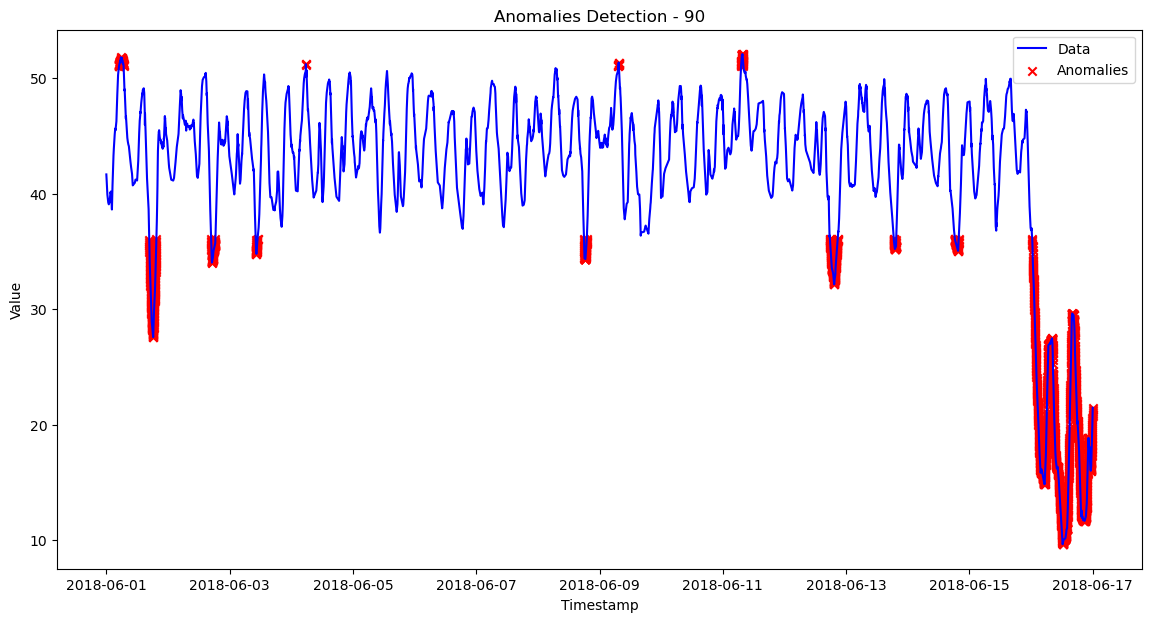

In [13]:
import matplotlib.pyplot as plt

# Print the anomalies
anomaly_indices = np.where(anomalies)[0]
anomaly_values = data.iloc[anomaly_indices]['Value']
print(f"Anomaly Indices: {anomaly_indices}")
print(f"Anomaly Values: {anomaly_values.values}")

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Value'], label='Data', color='blue')
plt.scatter(data.iloc[anomaly_indices].index, anomaly_values, color='red', label='Anomalies', marker='x')

# Add labels and title
plt.title('Anomalies Detection - 90')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Print the anomalies
anomaly_indices = np.where(anomalies)[0]
anomaly_values = data.iloc[anomaly_indices]['Value']
print(f"Anomaly Indices: {anomaly_indices}")
print(f"Anomaly Values: {anomaly_values.values}")

# Create a new figure
plt.figure(figsize=(14, 7))

# Plot weekdays in blue and weekends in green
for i in range(len(data)):
    if data.index[i].weekday() < 5:  # Weekday (Monday to Friday)
        plt.plot(data.index[i], data['Value'].iloc[i], color='blue', marker='o', markersize=4, label='Weekday' if i == 0 else "")
    else:  # Weekend (Saturday and Sunday)
        plt.plot(data.index[i], data['Value'].iloc[i], color='green', marker='o', markersize=4, label='Weekend' if i == 0 else "")

# Highlight anomalies
plt.scatter(data.iloc[anomaly_indices].index, anomaly_values, color='red', label='Anomalies', marker='x')

# Add labels and title
plt.title('Anomalies Detection - 90')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


IndexError: positional indexers are out-of-bounds

In [89]:


    
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

class AutoencoderAnomalyDetector:
    def __init__(self, data_file, model_file='autoencoder_model.h5'):
        self.data_file = data_file
        self.model_file = model_file
        self.data = None
        self.scaler = MinMaxScaler()
        self.autoencoder = None
        self.threshold = None

    def load_and_preprocess_data(self):
        """Load data and normalize it"""
        data = pd.read_csv(self.data_file)
        data.columns = ['Timestamp', 'Value']
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M')
        data.set_index('Timestamp', inplace=True)

        # Normalize the data
        data['Value_scaled'] = self.scaler.fit_transform(data[['Value']])
        self.data = data
        return self.data
    
    def build_autoencoder(self):
        """Build and compile the autoencoder model"""
        input_layer = layers.Input(shape=(1,))
        encoder = layers.Dense(16, activation="relu")(input_layer)
        encoder = layers.Dense(8, activation="relu")(encoder)
        encoder = layers.Dense(4, activation="relu")(encoder)

        decoder = layers.Dense(8, activation="relu")(encoder)
        decoder = layers.Dense(16, activation="relu")(decoder)
        output_layer = layers.Dense(1, activation="sigmoid")(decoder)

        self.autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
        self.autoencoder.compile(optimizer="adam", loss="mse")
        return self.autoencoder
    
    def train_autoencoder(self, epochs=20, batch_size=128):
        """Train the autoencoder model"""
        X_train = self.data['Value_scaled'].values.reshape(-1, 1)
        history = self.autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)
        return history
    
    def save_model(self):
        """Save the trained model"""
        self.autoencoder.save(self.model_file)
    
    def load_model(self):
        """Load the saved autoencoder model"""
        self.autoencoder = tf.keras.models.load_model(self.model_file, compile=False)
        self.autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
    
    def detect_anomalies(self):
        """Detect anomalies using the trained autoencoder"""
        X_train = self.data['Value_scaled'].values.reshape(-1, 1)

        # Reconstruct the data
        reconstructed_data = self.autoencoder.predict(X_train)

        # Calculate reconstruction error for each point
        reconstruction_error = tf.keras.losses.mse(X_train, reconstructed_data).numpy()

        # Set threshold for anomaly detection
        self.threshold = np.percentile(reconstruction_error, 95)
        print(f"Threshold for anomaly detection: {self.threshold}")

        # Detect anomalies based on the threshold
        anomalies = reconstruction_error > self.threshold
        
        return anomalies, reconstruction_error
    
    def plot_anomalies(self, anomalies):
        """Plot the data and highlight the anomalies"""
        # Get the index of anomalies
        anomaly_indices = np.where(anomalies)[0]
        
        # Create separate datasets for weekdays and weekends
        weekdays = self.data[self.data.index.dayofweek < 5]  # Monday to Friday
        weekends = self.data[self.data.index.dayofweek >= 5]  # Saturday and Sunday

        # Get anomalies for weekdays and weekends
        weekday_anomalies = self.data.iloc[anomaly_indices][self.data.index.dayofweek < 5]
        weekend_anomalies = self.data.iloc[anomaly_indices][self.data.index.dayofweek >= 5]

        # Plotting weekday anomalies
        plt.figure(figsize=(14, 7))
        plt.plot(weekdays.index, weekdays['Value'], label='Weekday Data', color='blue')
        plt.scatter(weekday_anomalies.index, weekday_anomalies['Value'], color='red', label='Weekday Anomalies', marker='x')
        plt.title('Anomalies Detection - Weekdays')
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

        # Plotting weekend anomalies
        plt.figure(figsize=(14, 7))
        plt.plot(weekends.index, weekends['Value'], label='Weekend Data', color='green')
        plt.scatter(weekend_anomalies.index, weekend_anomalies['Value'], color='red', label='Weekend Anomalies', marker='x')
        plt.title('Anomalies Detection - Weekends')
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

    def inference(self):
        """Perform inference with the saved model"""
        self.load_model()
        X_train = self.data['Value_scaled'].values.reshape(-1, 1)

        # Reconstruct the data using the loaded model
        reconstructed_data_inference = self.autoencoder.predict(X_train)

        # Calculate reconstruction error
        reconstruction_error_inference = tf.keras.losses.mse(X_train, reconstructed_data_inference).numpy()

        # Detect anomalies using the same threshold as before
        anomalies_inference = reconstruction_error_inference > self.threshold
        
        return anomalies_inference


# --- Main execution ---

if __name__ == "__main__":
    # Create an instance of the AutoencoderAnomalyDetector class
    detector = AutoencoderAnomalyDetector(data_file='./Inputs/214_LZA306A.PNT.csv')
    
    # Load and preprocess data
    detector.load_and_preprocess_data()
    
    # Build and train the autoencoder
    detector.build_autoencoder()
    detector.train_autoencoder(epochs=20, batch_size=128)
    
    # Save the model after training
    detector.save_model()
    
    # Detect anomalies
    anomalies, reconstruction_error = detector.detect_anomalies()
    
    # Plot the anomalies
    detector.plot_anomalies(anomalies)
    
    # Perform inference with the saved model
    anomalies_inference = detector.inference()
    
    # Plot the anomalies detected during inference
    detector.plot_anomalies(anomalies_inference)


Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - loss: 0.0041 - val_loss: 0.0042
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 2.1446e-04 - val_loss: 0.0015
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 7.9728e-05 - val_loss: 7.8368e-04
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 4.0519e-05 - val_loss: 5.3785e-04
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 2.8121e-05 - val_loss: 4.1351e-04
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 2.9487e-05 - val_loss: 3.3512e-04
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1.6165e-05 - val_loss: 2.8139e-04
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.9549e-05 - val_loss: 2.4618e-04
Epoch 9/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.5483e-05 - val_loss: 2.1698e-04
Epoch 10/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 1.4203e-05 - val_loss: 1.8926e-04
Epoch 11/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/s

855/855 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step
Threshold for anomaly detection: 1.679041270108428e-05


ValueError: Item wrong length 27360 instead of 1359.